In [183]:
print('h')

h


# Titanic Dataset Description

The Titanic dataset is a historical dataset that gained popularity in the field of data science and machine learning for its applicability in predicting passenger survival rates on the ill-fated maiden voyage of the RMS Titanic. This dataset provides a comprehensive collection of information about passengers on board, including various attributes that can be used for analysis and predictive modeling.

Column | Description
:---|:---
`PassengerId` |  A unique identifier assigned to each passenger.
`Survived` | Binary variable indicating whether a passenger survived (1) or did not survive (0).
`Pclass (Passenger Class)` | Ticket class, representing socio-economic status (1st, 2nd, or 3rd).
`Name` | The name of the passenger.
`Sex` | Gender of the passenger (male or female).
`Age` | Age of the passenger. (Note: Some entries may contain null values.)
`SibSp` | Number of siblings/spouses aboard the Titanic.
`Parch` | Number of parents/children aboard the Titanic.
`Ticket` | Ticket number
`Fare` | Passenger fare
`Cabin` | Cabin number. (Note: Some entries may contain null values.)
`Embarked` | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Task Description: Predicting Survival on the Titanic**

**Objective:**
The goal of this task is to develop a predictive model that can accurately predict whether a passenger on the Titanic survived or not based on a set of given features. This binary classification task involves training machine learning models using historical data and evaluating their performance in terms of predicting survival outcomes.

**Steps:**

1. **Data Loading and Exploration:**
   - Load the Titanic dataset into your preferred data analysis environment (e.g., Python with pandas).
   - Explore the dataset to understand its structure, check for missing values, and gain insights into the distribution of key features.

2. **Data Preprocessing:**
   - Handle missing values in the dataset (e.g., impute missing ages or drop irrelevant columns).
   - Encode categorical variables and convert features into a format suitable for model training.

3. **Feature Engineering:**
   - Explore opportunities for creating new features that might enhance the model's predictive performance.
   - Consider transforming or combining existing features to extract meaningful information.

4. **Data Splitting:**
   - Split the dataset into training and testing sets to facilitate model training and evaluation.

5. **Model Selection:**
   - Choose a variety of classification models suitable for binary outcomes (e.g., Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, etc.).
   - Implement each model and train it on the training dataset.

6. **Model Training:**
   - Train each selected model using the training dataset.
   - Optimize model parameters to improve predictive performance.

7. **Model Evaluation:**
   - Evaluate the performance of each model on the testing dataset using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
   - Compare and contrast the strengths and weaknesses of different models.

8. **Hyperparameter Tuning:**
   - Fine-tune the hyperparameters of the selected models to achieve better predictive accuracy.

9. **Results Analysis:**
   - Analyze and interpret the results, identifying key features that contribute to the prediction of survival.

10. **Conclusion:**
    - Summarize findings, discuss the limitations of the models, and propose potential areas for further improvement.

**Deliverables:**
- Jupyter notebook or script detailing the data exploration, preprocessing steps, and model implementations.
- Evaluation metrics for each model.
- Visualizations (if applicable) to aid in understanding the data and model performance.
- A concise report summarizing the overall findings and recommendations.

This task aims to provide a comprehensive understanding of the Titanic dataset, showcase proficiency in data preprocessing and feature engineering, and evaluate the effectiveness of different machine learning models in predicting survival outcomes.

# Important libraries

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report
import joblib

import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [185]:
data = pd.read_csv('train.csv')

In [186]:
test = pd.read_csv('test.csv')

In [187]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [189]:
# there are null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
# there is imbalance
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [191]:
data.shape

(891, 12)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [193]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


# Data Cleaning, Analysis, Preparation

In [194]:
df = copy.deepcopy(data)

In [195]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [197]:
df.isna().sum()
# age column has null values, we have to fill them
# we have to drop cabin column, because, it has a lot of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

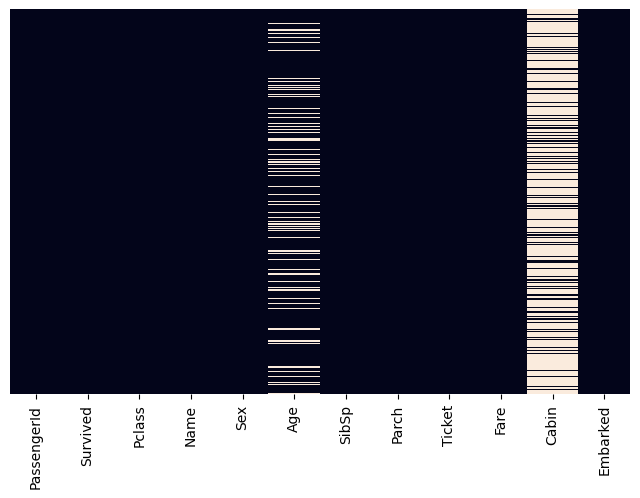

In [198]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isna(), cbar=False, yticklabels=False);

In [199]:
# drop PassengerId, Name, Ticket - don't want get some information
# Cabin - a lot of null values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [200]:
# do the same change for test csv
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [201]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [202]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

## Outlier check and visualization of numeric columns

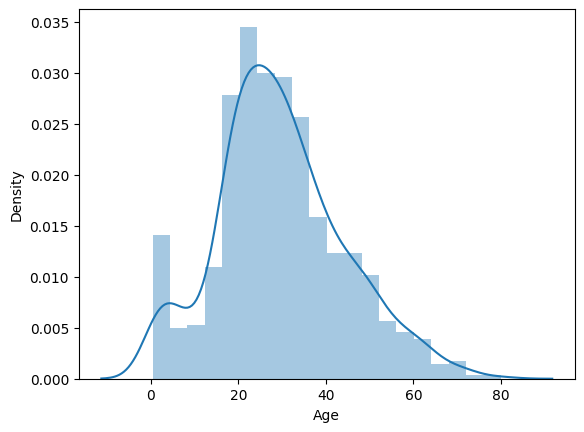

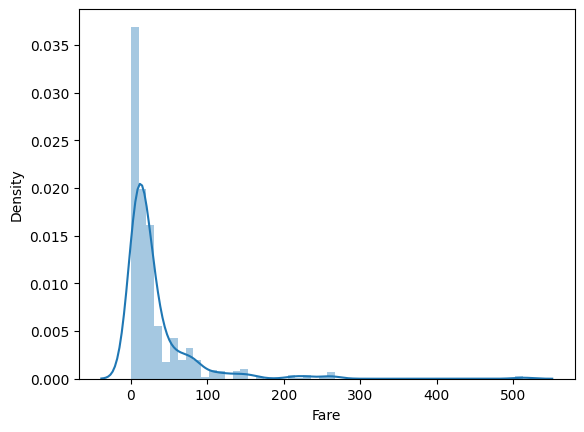

In [203]:
for col in ['Age', 'Fare']:
    sns.distplot(df[col], kde=True)
    plt.show()
# We feel a lot of outliers in fare column

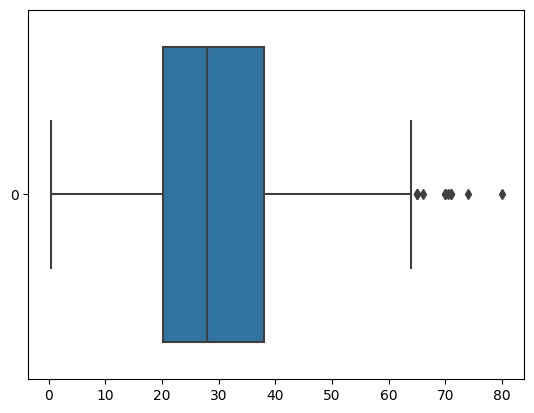

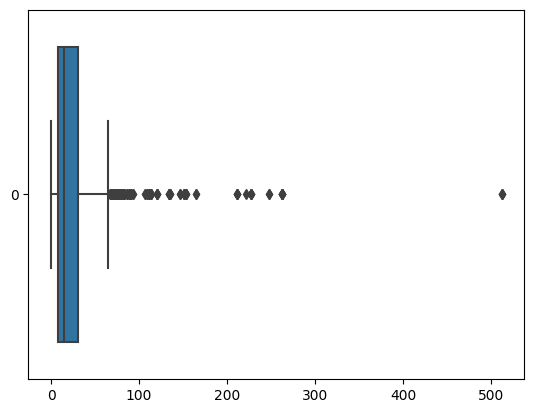

In [204]:
for col in ['Age', 'Fare']:
    sns.boxplot(df[col], orient='h')
    plt.show()
# also there are some outliers in age column

## Clear Outliers with boxplot method, is it important?
Column Fare: in imbalanced dataset, we will not clear outliers, because, there is meaning of them I think

Column Age: it is good don't do clearing outliers in this column also, but for learning how boxplot method works, I will clear them (actually, there is less, it will not affect the result a lot)

In [205]:
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 -  q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [206]:
for col in ['Age']:
    boxplot_clip(col)

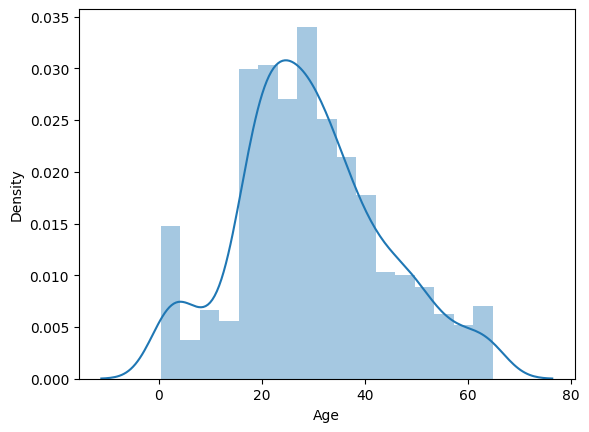

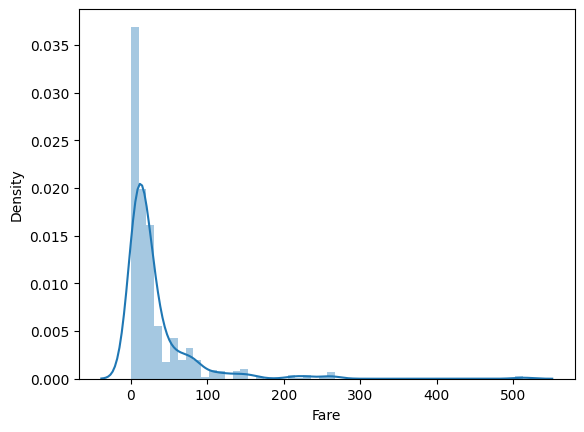

In [207]:
for col in ['Age', 'Fare']:
    sns.distplot(df[col], kde=True)
    plt.show()

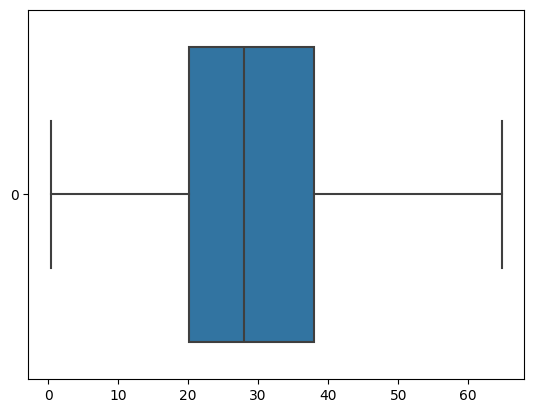

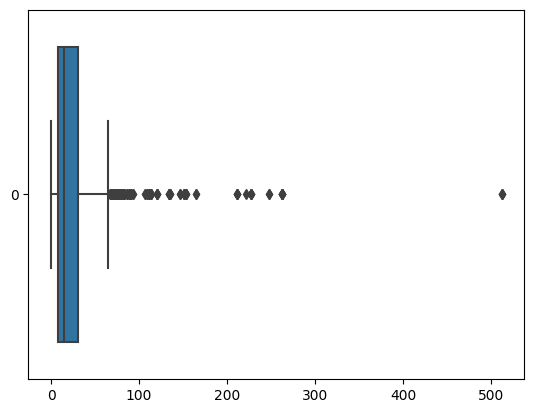

In [208]:
for col in ['Age', 'Fare']:
    sns.boxplot(df[col], orient='h')
    plt.show()
# age column has not outliers

In [209]:
# do the same thing for test column
# get metrics from train data, apply on test data :)
def boxplot_clip_for_test_data(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 - q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    test[col] = test[col].clip(lowerbound,upperbound)

In [210]:
for col in ['Age']:
    boxplot_clip_for_test_data(col)

# Visualizatin of categoric columns

In [211]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [212]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          82
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

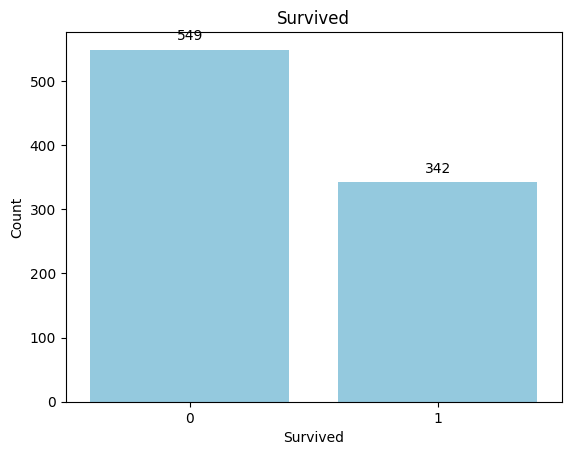

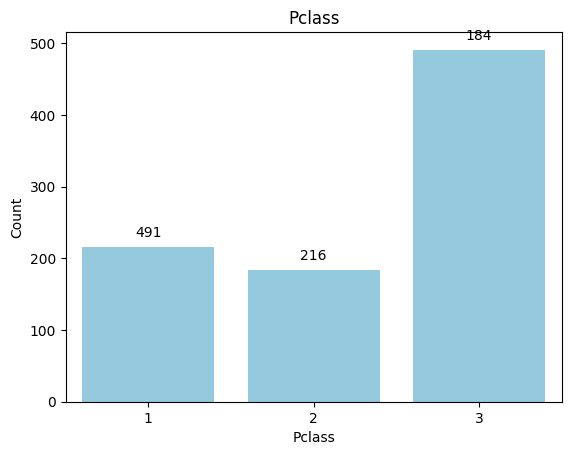

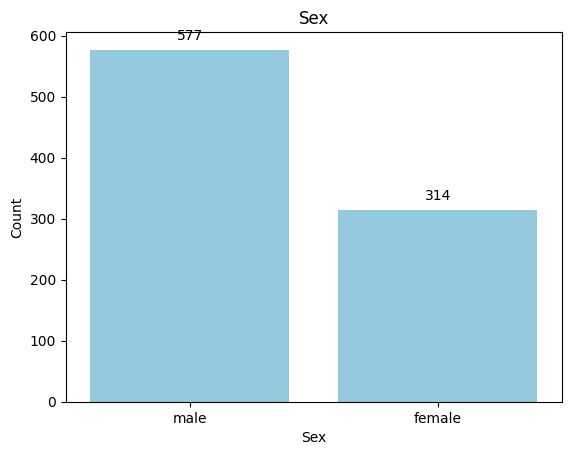

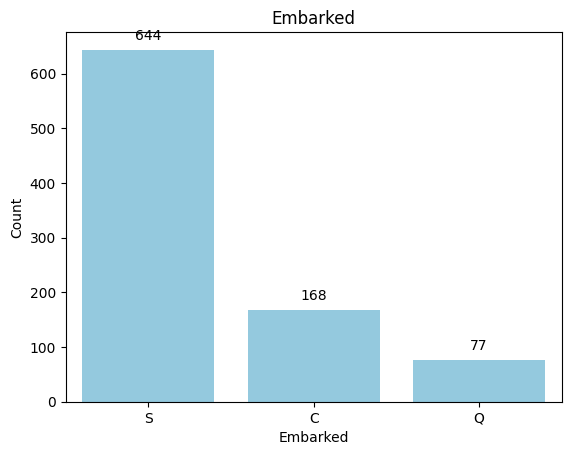

In [213]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    unique_counts = df[col].value_counts()
    ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, color='skyblue')
    for p, label in zip(ax.patches, unique_counts.values):
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.title(col.capitalize())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
# there is imbalance in target (Survived column)

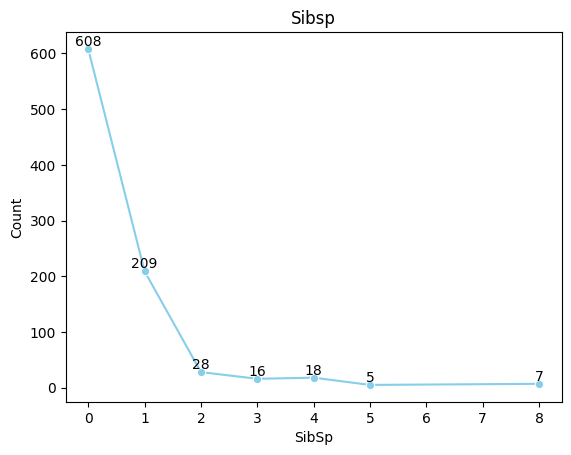

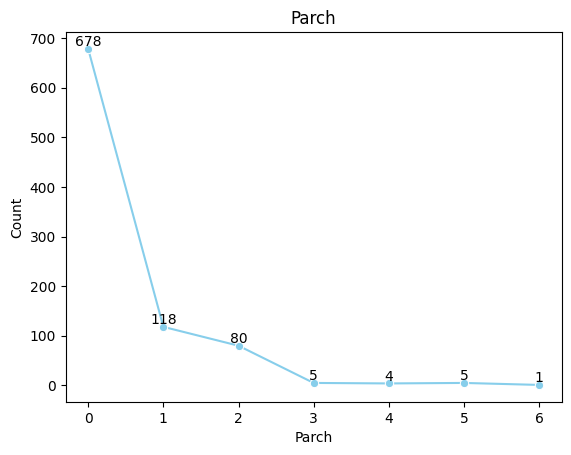

In [214]:
for col in ['SibSp', 'Parch']:
    unique_counts = df[col].value_counts()
    ax = sns.lineplot(x=unique_counts.index, y=unique_counts.values, marker='o', color='skyblue')

    for i, v in zip(unique_counts.index, unique_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.title(col.capitalize())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Filling null values

In [215]:
df.isna().sum()
# in logic we can fill age column according to Passenger Class column, it is better than filling it with mean, median or mode
# in reality we can not say it is better to do this, we have to check all ways, then we can say which is better in this situation[]

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [216]:
pivot_table = pd.pivot_table(df, values='Age', index='Pclass', aggfunc='median')
pivot_table
# fill according to numbers

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [217]:
def fill(value):
    if value == 1:
        return 37
    elif value == 2:
        return 29
    else:
        return 24

In [218]:
df[df['Pclass']==1].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0000,1,0,71.2833,C
3,1,1,female,35.0000,1,0,53.1000,S
6,0,1,male,54.0000,0,0,51.8625,S
11,1,1,female,58.0000,0,0,26.5500,S
23,1,1,male,28.0000,0,0,35.5000,S
27,0,1,male,19.0000,3,2,263.0000,S
30,0,1,male,40.0000,0,0,27.7208,C
31,1,1,female,NaN,1,0,146.5208,C
34,0,1,male,28.0000,1,0,82.1708,C
35,0,1,male,42.0000,1,0,52.0000,S


In [219]:
df[df['Pclass']==2].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
9,1,2,female,14.0000,1,0,30.0708,C
15,1,2,female,55.0000,0,0,16.0000,S
17,1,2,male,NaN,0,0,13.0000,S
20,0,2,male,35.0000,0,0,26.0000,S
21,1,2,male,34.0000,0,0,13.0000,S
33,0,2,male,64.8125,0,0,10.5000,S
41,0,2,female,27.0000,1,0,21.0000,S
43,1,2,female,3.0000,1,2,41.5792,C
53,1,2,female,29.0000,1,0,26.0000,S
56,1,2,female,21.0000,0,0,10.5000,S


In [220]:
df[df['Pclass']==3].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
10,1,3,female,4.0,1,1,16.7000,S
12,0,3,male,20.0,0,0,8.0500,S
13,0,3,male,39.0,1,5,31.2750,S
14,0,3,female,14.0,0,0,7.8542,S


In [221]:
df['Age'] = df['Age'].fillna(df['Pclass'].map(fill))

In [222]:
# do the same thing for test column
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [223]:
test['Age'] = test['Age'].fillna(test['Pclass'].map(fill))

In [224]:
test.isna().sum()
# we have to fill Fare column

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [225]:
df[df['Pclass']==1].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0000,1,0,71.2833,C
3,1,1,female,35.0000,1,0,53.1000,S
6,0,1,male,54.0000,0,0,51.8625,S
11,1,1,female,58.0000,0,0,26.5500,S
23,1,1,male,28.0000,0,0,35.5000,S
27,0,1,male,19.0000,3,2,263.0000,S
30,0,1,male,40.0000,0,0,27.7208,C
31,1,1,female,37.0000,1,0,146.5208,C
34,0,1,male,28.0000,1,0,82.1708,C
35,0,1,male,42.0000,1,0,52.0000,S


In [226]:
df[df['Pclass']==2].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
9,1,2,female,14.0000,1,0,30.0708,C
15,1,2,female,55.0000,0,0,16.0000,S
17,1,2,male,29.0000,0,0,13.0000,S
20,0,2,male,35.0000,0,0,26.0000,S
21,1,2,male,34.0000,0,0,13.0000,S
33,0,2,male,64.8125,0,0,10.5000,S
41,0,2,female,27.0000,1,0,21.0000,S
43,1,2,female,3.0000,1,2,41.5792,C
53,1,2,female,29.0000,1,0,26.0000,S
56,1,2,female,21.0000,0,0,10.5000,S


In [227]:
df[df['Pclass']==3].head(25)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
10,1,3,female,4.0,1,1,16.7000,S
12,0,3,male,20.0,0,0,8.0500,S
13,0,3,male,39.0,1,5,31.2750,S
14,0,3,female,14.0,0,0,7.8542,S


In [228]:
df.isna().sum()
# we have to fill embarked column
# look at visualization of this column
# fill it with mode in pipeline

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [229]:
test.isna().sum()
# look at visual of Fare column for filling it with something
# fill it with median in pipeline

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

# Preprocessing for modelling

In [230]:
# look at column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [231]:
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [232]:
test['Sex'] = test['Sex'].map({'male':1, 'female':0})

In [233]:
df.duplicated().any()

True

In [234]:
df.duplicated().sum()

118

In [235]:
df[df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,0,24.0,0,0,7.7500,Q
76,0,3,1,24.0,0,0,7.8958,S
77,0,3,1,24.0,0,0,8.0500,S
87,0,3,1,24.0,0,0,8.0500,S
89,0,3,1,24.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,1,26.0,0,0,7.8958,S
877,0,3,1,19.0,0,0,7.8958,S
878,0,3,1,24.0,0,0,7.8958,S
884,0,3,1,25.0,0,0,7.0500,S


In [236]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [237]:
df.duplicated().sum()

0

In [238]:
df_copy = copy.deepcopy(df)

In [239]:
ohe = OneHotEncoder(handle_unknown='ignore', min_frequency=0.10, drop='if_binary')

cols = ['Embarked']

ohe.fit(df[cols])

transformed = ohe.transform(df[cols]).toarray()

transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out(cols))

df.drop(cols, axis=1, inplace=True)

df_final = pd.concat([df, transformed_df], axis=1)
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_infrequent_sklearn
0,0,3,1,22.0,1,0,7.2500,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,1.0,0.0


In [240]:
test_copy = copy.deepcopy(test)

In [241]:
# do the same thing for test data
transformed_test = ohe.transform(test[cols]).toarray()

transformed_df_test = pd.DataFrame(transformed_test, columns=ohe.get_feature_names_out(cols))

test.drop(cols, axis=1, inplace=True)

df_final_test = pd.concat([test, transformed_df_test], axis=1)
df_final_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_infrequent_sklearn
0,3,1,34.5,0,0,7.8292,0.0,0.0,1.0
1,3,0,47.0,1,0,7.0000,0.0,1.0,0.0
2,2,1,62.0,0,0,9.6875,0.0,0.0,1.0
3,3,1,27.0,0,0,8.6625,0.0,1.0,0.0
4,3,0,22.0,1,1,12.2875,0.0,1.0,0.0


In [242]:
df_final_copy = copy.deepcopy(df_final)

In [243]:
df_final_test_copy = copy.deepcopy(df_final_test)

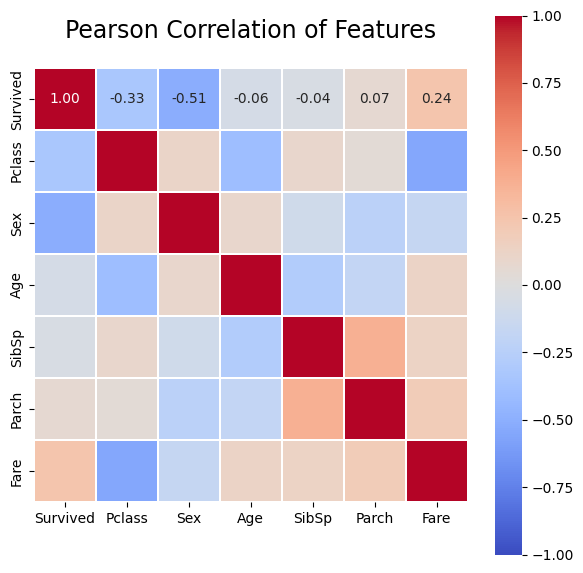

In [245]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=17)
sns.heatmap(df.corr('pearson'), linewidths=0.1, vmax=1.0, vmin=-1, square=True, cmap=colormap, linecolor='white', annot=True, fmt=".2f");

In [246]:
df.corr('pearson')
# it seems all correlationa are okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.332893,-0.510751,-0.063532,-0.040721,0.066168,0.244034
Pclass,-0.332893,1.000000,0.113149,-0.401235,0.089469,0.042385,-0.551565
Sex,-0.510751,0.113149,1.000000,0.089497,-0.095622,-0.234368,-0.166547
Age,-0.063532,-0.401235,0.089497,1.000000,-0.287262,-0.186654,0.119603
SibSp,-0.040721,0.089469,-0.095622,-0.287262,1.000000,0.379745,0.132573
Parch,0.066168,0.042385,-0.234368,-0.186654,0.379745,1.000000,0.189286
Fare,0.244034,-0.551565,-0.166547,0.119603,0.132573,0.189286,1.000000


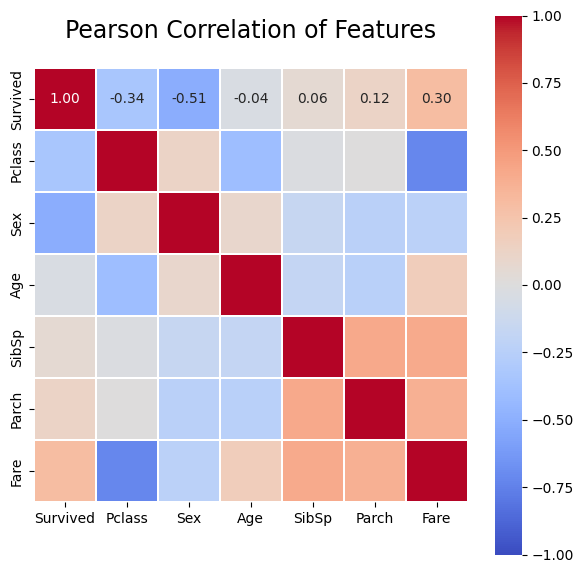

In [247]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=17)
sns.heatmap(df.corr('spearman'), linewidths=0.1, vmax=1.0, vmin=-1, square=True, cmap=colormap, linecolor='white', annot=True, fmt=".2f");

In [248]:
df.corr('spearman')
# it seems all correlations are okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336014,-0.510751,-0.038226,0.057088,0.122112,0.303850
Pclass,-0.336014,1.000000,0.117486,-0.404572,-0.023347,0.001111,-0.721562
Sex,-0.510751,0.117486,1.000000,0.086551,-0.160976,-0.239352,-0.232147
Age,-0.038226,-0.404572,0.086551,1.000000,-0.173580,-0.245057,0.176664
SibSp,0.057088,-0.023347,-0.160976,-0.173580,1.000000,0.414413,0.406693
Parch,0.122112,0.001111,-0.239352,-0.245057,0.414413,1.000000,0.375069
Fare,0.303850,-0.721562,-0.232147,0.176664,0.406693,0.375069,1.000000


In [249]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [252]:
calc_vif(df)
# there is no multicorrelation

,variables,VIF
0,Survived,1.940921
1,Pclass,4.630148
2,Sex,3.259252
3,Age,4.188933
4,SibSp,1.594895
5,Parch,1.583384
6,Fare,1.894611


# Train Test Split

In [254]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

# Building Pipeline

In [259]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_infrequent_sklearn
0,0,3,1,22.0,1,0,7.2500,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,1.0,0.0


In [261]:
df_final.isna().sum()

Survived                       0
Pclass                         0
Sex                            0
Age                            0
SibSp                          0
Parch                          0
Fare                           0
Embarked_C                     0
Embarked_S                     0
Embarked_infrequent_sklearn    0
dtype: int64

In [263]:
df_final_test.isnull().sum()

Pclass                         0
Sex                            0
Age                            0
SibSp                          0
Parch                          0
Fare                           1
Embarked_C                     0
Embarked_S                     0
Embarked_infrequent_sklearn    0
dtype: int64

In [265]:
df_final_test.columns
# choose names of columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_S', 'Embarked_infrequent_sklearn'],
      dtype='object')

In [266]:
df_final_test.nunique()
# look which columns are categoric or numeric for pipeline

Pclass                           3
Sex                              2
Age                             78
SibSp                            7
Parch                            8
Fare                           169
Embarked_C                       2
Embarked_S                       2
Embarked_infrequent_sklearn      2
dtype: int64

In [267]:
df_final_test.shape

(418, 9)

# Logistic Regression :)

In [302]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    logreg_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, random_state=42))
        ])
    
    logreg_pipeline.fit(X_train, y_train)
    
    predictions = logreg_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:02:19,827] A new study created in memory with name: no-name-0bb4d402-33d8-4987-bf91-4a368cf79dc7
[I 2023-12-10 02:02:19,917] Trial 0 finished with value: 0.7722604610510215 and parameters: {'C': 0.001414113772526351}. Best is trial 0 with value: 0.7722604610510215.
[I 2023-12-10 02:02:20,019] Trial 1 finished with value: 0.8714629083360647 and parameters: {'C': 67038.11544625094}. Best is trial 1 with value: 0.8714629083360647.
[I 2023-12-10 02:02:20,118] Trial 2 finished with value: 0.7891947995192833 and parameters: {'C': 0.001915105876805376}. Best is trial 1 with value: 0.8714629083360647.
[I 2023-12-10 02:02:20,207] Trial 3 finished with value: 0.8713536545394953 and parameters: {'C': 201.526933440797}. Best is trial 1 with value: 0.8714629083360647.
[I 2023-12-10 02:02:20,295] Trial 4 finished with value: 0.8705888779635093 and parameters: {'C': 1.4768959731154188}. Best is trial 1 with value: 0.8714629083360647.
[I 2023-12-10 02:02:20,368] Trial 5 finished with 

Best ROC AUC Score: 0.8715
Best Parameters:
  C: 67038.11544625094


In [303]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(**best_params, random_state=42))
])

In [307]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scorer = make_scorer(roc_auc_score)

In [304]:
scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

Pipeline's roc auc scores:  [0.7567402  0.79534314 0.74387255 0.78129759 0.71999378]
Average roc auc score of pipeline:  0.75944945142236


In [305]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.1),
                                                  ['Sex'])])),
                ('classifier',
                 LogisticRegression(C=67038.11544625094, random_state=42))])

Accuracy: 0.8041
Precision: 0.7792
Recall: 0.7407
F1 Score: 0.7595

Confusion Matrix:
[[96 17]
 [21 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       113
           1       0.78      0.74      0.76        81

    accuracy                           0.80       194
   macro avg       0.80      0.80      0.80       194
weighted avg       0.80      0.80      0.80       194


AUC-ROC: 0.8715
AUC-PR: 0.8608


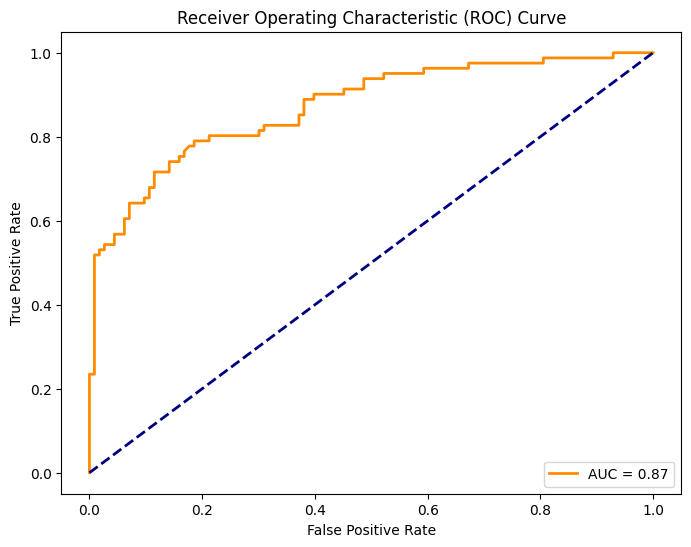

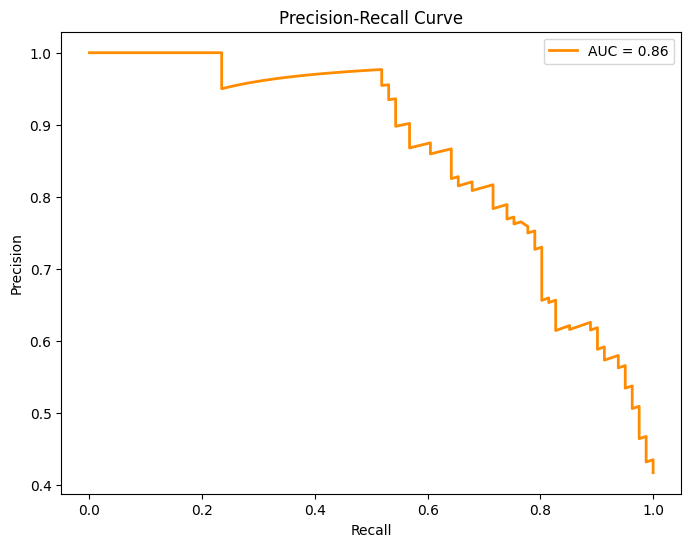

In [306]:
# Make predictions
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


# Decision Tree Classifier :)

In [342]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    dec_tree_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42))
        ])
    
    dec_tree_pipeline.fit(X_train, y_train)
    
    predictions = dec_tree_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:58:40,787] A new study created in memory with name: no-name-bdd37908-1759-4b72-89e0-6891d8359cc9
[I 2023-12-10 02:58:40,872] Trial 0 finished with value: 0.7904512181798318 and parameters: {'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7904512181798318.
[I 2023-12-10 02:58:40,973] Trial 1 finished with value: 0.7934556975854912 and parameters: {'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.7934556975854912.
[I 2023-12-10 02:58:41,036] Trial 2 finished with value: 0.8264503441494591 and parameters: {'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.8264503441494591.
[I 2023-12-10 02:58:41,122] Trial 3 finished with value: 0.8762700753851197 and parameters: {'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 3 with value: 0.8762700753851197.
[I 2023-12-10 02:58:41,194] Trial 4 finished with value: 0.87

Best ROC AUC Score: 0.8763
Best Parameters:
  max_depth: 3
  min_samples_split: 11
  min_samples_leaf: 9


In [343]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

dec_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(**best_params, random_state=42))
])

In [344]:
scores = cross_val_score(dec_tree_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

Pipeline's roc auc scores:  [0.80269608 0.76102941 0.72732843 0.830795   0.77503109]
Average roc auc score of pipeline:  0.7793760041329966


In [345]:
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.1),
                                                  ['Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=9,
                                        min_samples_split=11,
                                        random_state=42))])

Accuracy: 0.8093
Precision: 0.8056
Recall: 0.7160
F1 Score: 0.7582

Confusion Matrix:
[[99 14]
 [23 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       113
           1       0.81      0.72      0.76        81

    accuracy                           0.81       194
   macro avg       0.81      0.80      0.80       194
weighted avg       0.81      0.81      0.81       194


AUC-ROC: 0.8763
AUC-PR: 0.8368


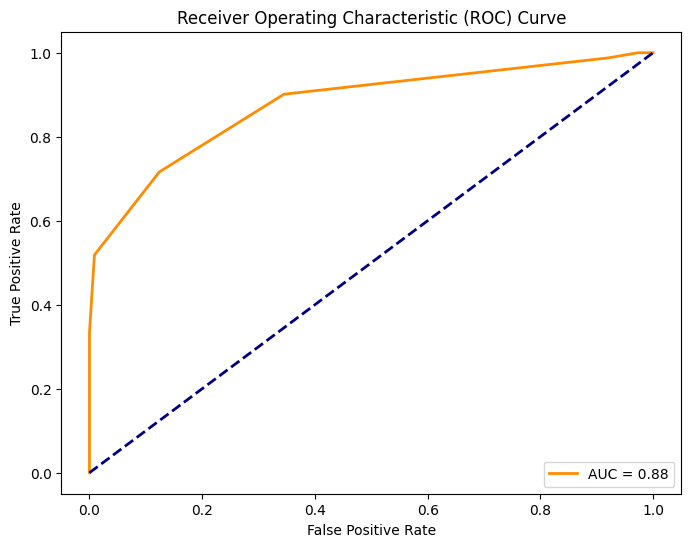

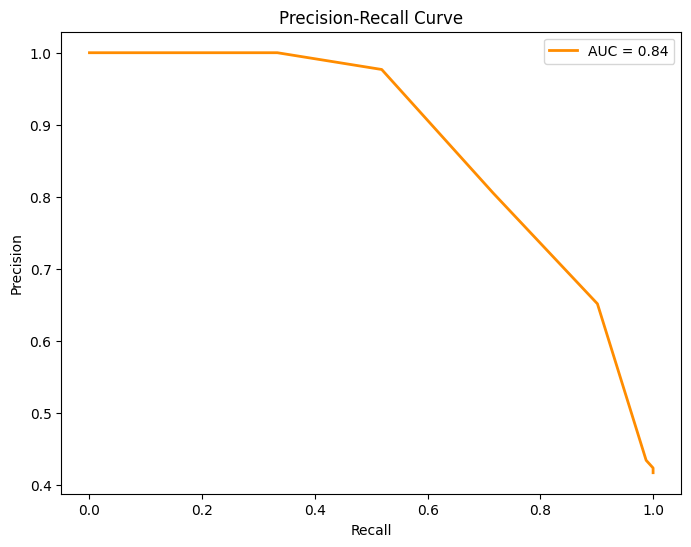

In [346]:
# Make predictions
y_pred = dec_tree_pipeline.predict(X_test)
y_proba = dec_tree_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Random Forest Classifier

In [313]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 100)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    rand_forest_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42))
        ])
    
    rand_forest_pipeline.fit(X_train, y_train)
    
    predictions = rand_forest_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:05:19,535] A new study created in memory with name: no-name-64615a25-0c63-426d-bcfb-2a2be220fd61
[I 2023-12-10 02:05:19,911] Trial 0 finished with value: 0.8622309625259478 and parameters: {'n_estimators': 54, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8622309625259478.
[I 2023-12-10 02:05:20,275] Trial 1 finished with value: 0.8645799191521906 and parameters: {'n_estimators': 69, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8645799191521906.
[I 2023-12-10 02:05:20,586] Trial 2 finished with value: 0.8533814050038238 and parameters: {'n_estimators': 71, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8645799191521906.
[I 2023-12-10 02:05:20,956] Trial 3 finished with value: 0.8436578171091444 and parameters: {'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 

Best ROC AUC Score: 0.8731
Best Parameters:
  n_estimators: 98
  max_depth: 5
  min_samples_split: 14
  min_samples_leaf: 1


In [314]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

rand_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**best_params, random_state=42))
])

In [315]:
scores = cross_val_score(rand_forest_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

Pipeline's roc auc scores:  [0.77267157 0.77267157 0.74019608 0.85044167 0.79151119]
Average roc auc score of pipeline:  0.7854984157842242


In [316]:
rand_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.1),
                                                  ['Sex'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=14,
                                        n_estimators=98, random_state=42))])

Accuracy: 0.8041
Precision: 0.8772
Recall: 0.6173
F1 Score: 0.7246

Confusion Matrix:
[[106   7]
 [ 31  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       113
           1       0.88      0.62      0.72        81

    accuracy                           0.80       194
   macro avg       0.83      0.78      0.79       194
weighted avg       0.82      0.80      0.80       194


AUC-ROC: 0.8731
AUC-PR: 0.8696


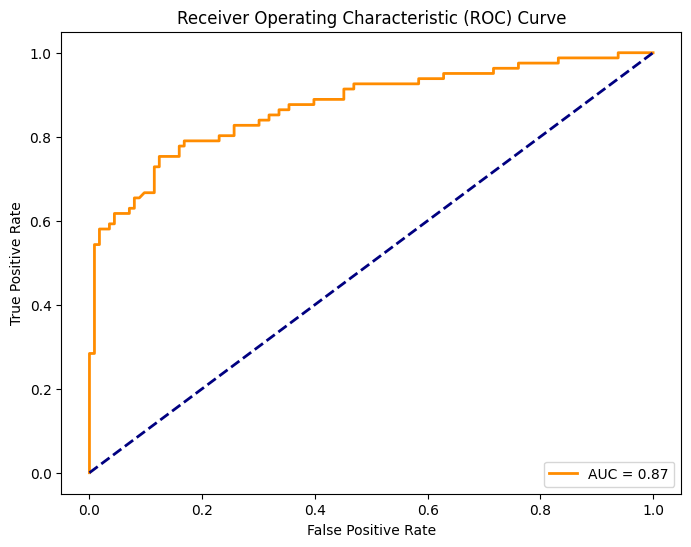

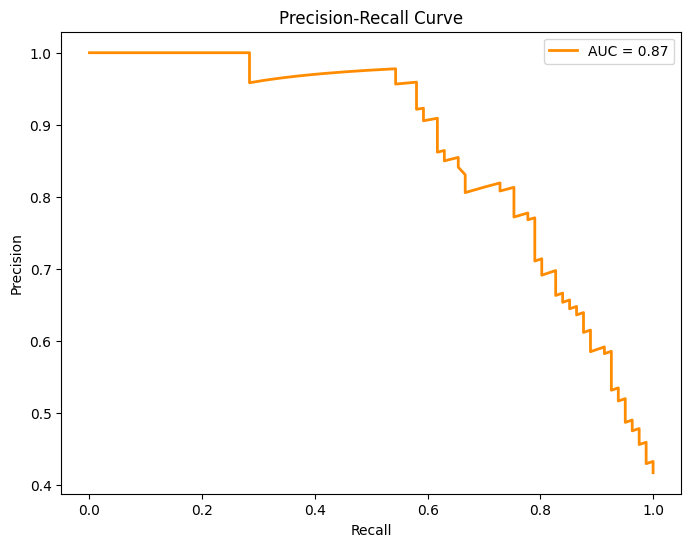

In [317]:
# Make predictions
y_pred = rand_forest_pipeline.predict(X_test)
y_proba = rand_forest_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# XGBoost Classifier

In [318]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'random_state': 42
    }
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(**params))
        ])
    
    xgb_pipeline.fit(X_train, y_train)
    
    predictions = xgb_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:06:34,404] A new study created in memory with name: no-name-ee2ccbce-63c0-4b99-bbcd-c58be2c50c74
[I 2023-12-10 02:06:34,570] Trial 0 finished with value: 0.8650169343384683 and parameters: {'n_estimators': 64, 'learning_rate': 0.035870480173284244, 'max_depth': 7, 'min_child_weight': 8, 'subsample': 0.7094671379555514, 'colsample_bytree': 0.7367313221198242, 'gamma': 0.005724576701032153, 'reg_alpha': 0.18413148323721695, 'reg_lambda': 1.0724592402215622e-05}. Best is trial 0 with value: 0.8650169343384683.


[I 2023-12-10 02:06:34,813] Trial 1 finished with value: 0.8713536545394953 and parameters: {'n_estimators': 185, 'learning_rate': 0.018252587248731727, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5855207797386598, 'colsample_bytree': 0.8269574579870347, 'gamma': 1.0083314153741146e-05, 'reg_alpha': 2.607458325958378e-06, 'reg_lambda': 0.0008867037574590175}. Best is trial 1 with value: 0.8713536545394953.
[I 2023-12-10 02:06:34,975] Trial 2 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 115, 'learning_rate': 0.02061440416500908, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.8513030711796596, 'colsample_bytree': 0.6248920046163501, 'gamma': 0.00017009145046851962, 'reg_alpha': 2.5751445039637243e-07, 'reg_lambda': 0.17590115633855352}. Best is trial 1 with value: 0.8713536545394953.
[I 2023-12-10 02:06:35,131] Trial 3 finished with value: 0.850650060089588 and parameters: {'n_estimators': 65, 'learning_rate': 0.01115625818475119, 'max_depth':

Best ROC AUC Score: 0.8913
Best Parameters:
  n_estimators: 142
  learning_rate: 0.005776133105459814
  max_depth: 3
  min_child_weight: 1
  subsample: 0.9987153252220333
  colsample_bytree: 0.8520867135536294
  gamma: 0.05072977990608707
  reg_alpha: 0.0017929883381900356
  reg_lambda: 0.0039044729837350014


In [319]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(**best_params))
])

In [320]:
scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

Pipeline's roc auc scores:  [0.77573529 0.76960784 0.71691176 0.85516296 0.77207711]
Average roc auc score of pipeline:  0.7778989954190632


In [321]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_un...
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.005776133105459814, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=142,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Accuracy: 0.8144
Precision: 0.9245
Recall: 0.6049
F1 Score: 0.7313

Confusion Matrix:
[[109   4]
 [ 32  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       113
           1       0.92      0.60      0.73        81

    accuracy                           0.81       194
   macro avg       0.85      0.78      0.79       194
weighted avg       0.84      0.81      0.81       194


AUC-ROC: 0.8919
AUC-PR: 0.8776


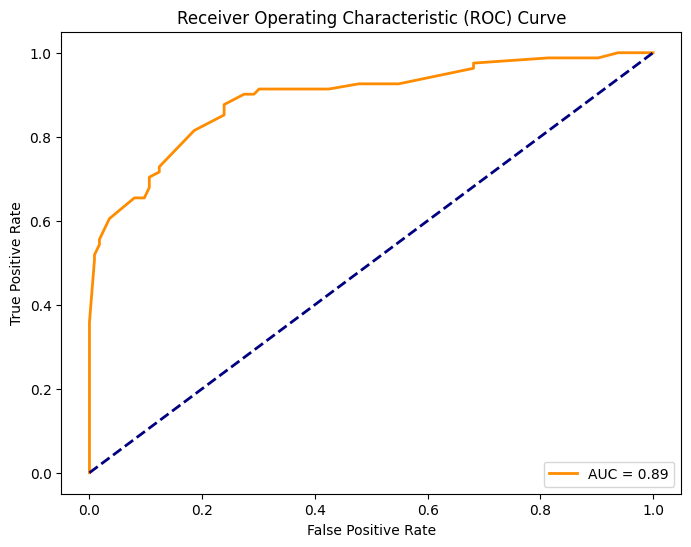

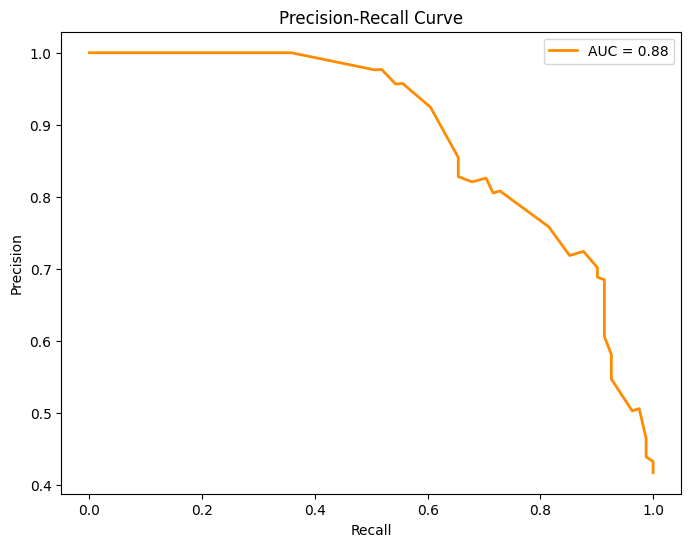

In [322]:
# Make predictions
y_pred = xgb_pipeline.predict(X_test)
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Light Gradient Boosting Classifier :)

In [328]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 42
    }
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    lgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(**params))
        ])
    
    lgb_pipeline.fit(X_train, y_train)
    
    predictions = lgb_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:37:56,566] A new study created in memory with name: no-name-70588d49-9e60-493e-9c44-a325b3b795fb


[LightGBM] [Warning] feature_fraction is set=0.7896883418157219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896883418157219
[LightGBM] [Warning] bagging_fraction is set=0.9355941020429364, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9355941020429364
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2023-12-10 02:37:56,824] Trial 0 finished with value: 0.8442040860919917 and parameters: {'boosting_type': 'dart', 'num_leaves': 153, 'learning_rate': 0.02361527333543659, 'feature_fraction': 0.7896883418157219, 'bagging_fraction': 0.9355941020429364, 'bagging_freq': 9, 'min_child_samples': 24}. Best is trial 0 with value: 0.8442040860919917.


[LightGBM] [Warning] feature_fraction is set=0.8725126928523075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8725126928523075
[LightGBM] [Warning] bagging_fraction is set=0.8420103374506847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8420103374506847
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:37:57,249] Trial 1 finished with value: 0.8611384245602535 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 103, 'learning_rate': 0.00301864280736679, 'feature_fraction': 0.8725126928523075, 'bagging_fraction': 0.8420103374506847, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 1 with value: 0.8611384245602535.
[I 2023-12-10 02:37:57,388] Trial 2 finished with value: 0.8515787173604282 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 188, 'learning_rate': 0.08330068202394288, 'feature_fraction': 0.9635609247158763, 'bagging_fraction': 0.5347029980438778, 'bagging_freq': 9, 'min_child_samples': 96}. Best is trial 1 with value: 0.8611384245602535.


[LightGBM] [Warning] feature_fraction is set=0.9635609247158763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9635609247158763
[LightGBM] [Warning] bagging_fraction is set=0.5347029980438778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5347029980438778
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7555247162701773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7555247162701773
[LightGBM] [Warning] bagging_fraction is set=0.6138211840802438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6138211840802438
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:37:57,557] Trial 3 finished with value: 0.8647437998470446 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'learning_rate': 0.07898890550426231, 'feature_fraction': 0.7555247162701773, 'bagging_fraction': 0.6138211840802438, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:37:57,724] Trial 4 finished with value: 0.8419643832623185 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 142, 'learning_rate': 0.0022581786908315534, 'feature_fraction': 0.5466604152316066, 'bagging_fraction': 0.7398079671849574, 'bagging_freq': 9, 'min_child_samples': 82}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.5466604152316066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5466604152316066
[LightGBM] [Warning] bagging_fraction is set=0.7398079671849574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7398079671849574
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6065153006326773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6065153006326773
[LightGBM] [Warning] bagging_fraction is set=0.5942304352894632, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5942304352894632
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-12-10 02:37:57,852] Trial 5 finished with value: 0.8510870752758658 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 199, 'learning_rate': 0.016790695276130013, 'feature_fraction': 0.6065153006326773, 'bagging_fraction': 0.5942304352894632, 'bagging_freq': 6, 'min_child_samples': 76}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:37:58,001] Trial 6 finished with value: 0.8455697585491095 and parameters: {'boosting_type': 'dart', 'num_leaves': 133, 'learning_rate': 0.002083656468540181, 'feature_fraction': 0.5797636600534206, 'bagging_fraction': 0.7227697535710267, 'bagging_freq': 5, 'min_child_samples': 76}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.5797636600534206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5797636600534206
[LightGBM] [Warning] bagging_fraction is set=0.7227697535710267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7227697535710267
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8975848080204636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8975848080204636
[LightGBM] [Warning] bagging_fraction is set=0.8609420686878314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8609420686878314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:37:58,149] Trial 7 finished with value: 0.8600458865945592 and parameters: {'boosting_type': 'dart', 'num_leaves': 70, 'learning_rate': 0.01854349672920756, 'feature_fraction': 0.8975848080204636, 'bagging_fraction': 0.8609420686878314, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:37:58,276] Trial 8 finished with value: 0.8632142466950725 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 155, 'learning_rate': 0.001651220124827498, 'feature_fraction': 0.8852247680570776, 'bagging_fraction': 0.851163438886088, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:37:58,396] Trial 9 finished with value: 0.8619032011362395 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 201, 'learning_rate': 0.0013981883656396137, 'feature_fraction': 0.8651510770305737, 'bagging_fraction': 0.7505967987789988, 'bagging_freq': 3, 'min_child_samples': 48}. Bes

[LightGBM] [Warning] feature_fraction is set=0.8852247680570776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8852247680570776
[LightGBM] [Warning] bagging_fraction is set=0.851163438886088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.851163438886088
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8651510770305737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8651510770305737
[LightGBM] [Warning] bagging_fraction is set=0.7505967987789988, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7505967987789988
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:37:58,684] Trial 10 finished with value: 0.843548563312575 and parameters: {'boosting_type': 'dart', 'num_leaves': 20, 'learning_rate': 0.09347613795645372, 'feature_fraction': 0.6865939373647626, 'bagging_fraction': 0.6200535759730048, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.6865939373647626, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6865939373647626
[LightGBM] [Warning] bagging_fraction is set=0.6200535759730048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200535759730048
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-12-10 02:37:58,894] Trial 11 finished with value: 0.8592264831202884 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 243, 'learning_rate': 0.006723386724720149, 'feature_fraction': 0.7442524484469568, 'bagging_fraction': 0.982762766888563, 'bagging_freq': 1, 'min_child_samples': 61}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.7442524484469568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7442524484469568
[LightGBM] [Warning] bagging_fraction is set=0.982762766888563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.982762766888563
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-12-10 02:37:59,101] Trial 12 finished with value: 0.8505408062930185 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 70, 'learning_rate': 0.0011254750139099191, 'feature_fraction': 0.7890436150283882, 'bagging_fraction': 0.5014035698796355, 'bagging_freq': 1, 'min_child_samples': 33}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.7890436150283882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7890436150283882
[LightGBM] [Warning] bagging_fraction is set=0.5014035698796355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5014035698796355
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9990256691390219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990256691390219
[LightGBM] [Warning] bagging_fraction is set=0.6299165774866845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6299165774866845
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-12-10 02:37:59,285] Trial 13 finished with value: 0.8411996066863324 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 3, 'learning_rate': 0.00401190134854062, 'feature_fraction': 0.9990256691390219, 'bagging_fraction': 0.6299165774866845, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:37:59,486] Trial 14 finished with value: 0.8544193160712334 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 92, 'learning_rate': 0.00690821150413301, 'feature_fraction': 0.6856071056877592, 'bagging_fraction': 0.6966524110977369, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.6856071056877592, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6856071056877592
[LightGBM] [Warning] bagging_fraction is set=0.6966524110977369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6966524110977369
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:37:59,786] Trial 15 finished with value: 0.8373757238064022 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'learning_rate': 0.05293559051640369, 'feature_fraction': 0.8321856637849923, 'bagging_fraction': 0.8090399152531693, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.8321856637849923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8321856637849923
[LightGBM] [Warning] bagging_fraction is set=0.8090399152531693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8090399152531693
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-12-10 02:37:59,983] Trial 16 finished with value: 0.86086529006883 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 169, 'learning_rate': 0.035807005159029404, 'feature_fraction': 0.9185724944609526, 'bagging_fraction': 0.6694257364889511, 'bagging_freq': 7, 'min_child_samples': 61}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.9185724944609526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9185724944609526
[LightGBM] [Warning] bagging_fraction is set=0.6694257364889511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6694257364889511
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8233428898418969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8233428898418969
[LightGBM] [Warning] bagging_fraction is set=0.7676454443454526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7676454443454526
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:00,336] Trial 17 finished with value: 0.8552933464437888 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 112, 'learning_rate': 0.00987061049438153, 'feature_fraction': 0.8233428898418969, 'bagging_fraction': 0.7676454443454526, 'bagging_freq': 2, 'min_child_samples': 44}. Best is trial 3 with value: 0.8647437998470446.
[I 2023-12-10 02:38:00,618] Trial 18 finished with value: 0.8392876652463673 and parameters: {'boosting_type': 'dart', 'num_leaves': 254, 'learning_rate': 0.004563915897061094, 'feature_fraction': 0.5108329551736881, 'bagging_fraction': 0.8852516824727628, 'bagging_freq': 4, 'min_child_samples': 23}. Best is trial 3 with value: 0.8647437998470446.


[LightGBM] [Warning] feature_fraction is set=0.5108329551736881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5108329551736881
[LightGBM] [Warning] bagging_fraction is set=0.8852516824727628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8852516824727628
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-12-10 02:38:00,820] Trial 19 finished with value: 0.8750136567245711 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 57, 'learning_rate': 0.04118312456527576, 'feature_fraction': 0.934932512626107, 'bagging_fraction': 0.7975013376871612, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 19 with value: 0.8750136567245711.


[LightGBM] [Warning] feature_fraction is set=0.934932512626107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.934932512626107
[LightGBM] [Warning] bagging_fraction is set=0.7975013376871612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7975013376871612
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9341540560763668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9341540560763668
[LightGBM] [Warning] bagging_fraction is set=0.7850267038428351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7850267038428351
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-12-10 02:38:01,021] Trial 20 finished with value: 0.8726100732000438 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'learning_rate': 0.04644708118087428, 'feature_fraction': 0.9341540560763668, 'bagging_fraction': 0.7850267038428351, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 19 with value: 0.8750136567245711.
[I 2023-12-10 02:38:01,208] Trial 21 finished with value: 0.8753414181142795 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'learning_rate': 0.05267161653021568, 'feature_fraction': 0.9425555739752728, 'bagging_fraction': 0.793004463942568, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9425555739752728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9425555739752728
[LightGBM] [Warning] bagging_fraction is set=0.793004463942568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.793004463942568
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9470302334172491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9470302334172491
[LightGBM] [Warning] bagging_fraction is set=0.8003948715741881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8003948715741881
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-12-10 02:38:01,397] Trial 22 finished with value: 0.8727739538948979 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'learning_rate': 0.041260710861683696, 'feature_fraction': 0.9470302334172491, 'bagging_fraction': 0.8003948715741881, 'bagging_freq': 1, 'min_child_samples': 68}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:01,576] Trial 23 finished with value: 0.8526712553261226 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'learning_rate': 0.032081253667968726, 'feature_fraction': 0.9389253869722326, 'bagging_fraction': 0.811071239831148, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9389253869722326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9389253869722326
[LightGBM] [Warning] bagging_fraction is set=0.811071239831148, subsample=1.0 will be ignored. Current value: bagging_fraction=0.811071239831148
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9868775068082687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9868775068082687
[LightGBM] [Warning] bagging_fraction is set=0.7916530817581002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7916530817581002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:01,773] Trial 24 finished with value: 0.8701518627772316 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.05955645394677724, 'feature_fraction': 0.9868775068082687, 'bagging_fraction': 0.7916530817581002, 'bagging_freq': 2, 'min_child_samples': 68}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:01,964] Trial 25 finished with value: 0.8679121599475582 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 71, 'learning_rate': 0.03265883552480777, 'feature_fraction': 0.9476424507636727, 'bagging_fraction': 0.8985168704434001, 'bagging_freq': 1, 'min_child_samples': 70}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9476424507636727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9476424507636727
[LightGBM] [Warning] bagging_fraction is set=0.8985168704434001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8985168704434001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9647240209707323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9647240209707323
[LightGBM] [Warning] bagging_fraction is set=0.812811062851869, subsample=1.0 will be ignored. Current value: bagging_fraction=0.812811062851869
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-12-10 02:38:02,151] Trial 26 finished with value: 0.8492297607341855 and parameters: {'boosting_type': 'dart', 'num_leaves': 2, 'learning_rate': 0.05520225206229661, 'feature_fraction': 0.9647240209707323, 'bagging_fraction': 0.812811062851869, 'bagging_freq': 4, 'min_child_samples': 86}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:02,346] Trial 27 finished with value: 0.8661094723041626 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 118, 'learning_rate': 0.02345601226371407, 'feature_fraction': 0.9158833350820034, 'bagging_fraction': 0.7523275645919731, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9158833350820034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9158833350820034
[LightGBM] [Warning] bagging_fraction is set=0.7523275645919731, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7523275645919731
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9974876563634718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9974876563634718
[LightGBM] [Warning] bagging_fraction is set=0.8337887450810235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8337887450810235
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2023-12-10 02:38:02,533] Trial 28 finished with value: 0.8675843985578499 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 28, 'learning_rate': 0.06772580475514121, 'feature_fraction': 0.9974876563634718, 'bagging_fraction': 0.8337887450810235, 'bagging_freq': 10, 'min_child_samples': 100}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:02,741] Trial 29 finished with value: 0.854692450562657 and parameters: {'boosting_type': 'dart', 'num_leaves': 60, 'learning_rate': 0.04202630872784846, 'feature_fraction': 0.9078415476081102, 'bagging_fraction': 0.9149056920996821, 'bagging_freq': 8, 'min_child_samples': 77}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9078415476081102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9078415476081102
[LightGBM] [Warning] bagging_fraction is set=0.9149056920996821, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9149056920996821
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.9586382803622588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9586382803622588
[LightGBM] [Warning] bagging_fraction is set=0.9381421376022996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9381421376022996
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-12-10 02:38:02,938] Trial 30 finished with value: 0.868130667540697 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 86, 'learning_rate': 0.026486561767081754, 'feature_fraction': 0.9586382803622588, 'bagging_fraction': 0.9381421376022996, 'bagging_freq': 1, 'min_child_samples': 66}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:03,130] Trial 31 finished with value: 0.8714629083360647 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 56, 'learning_rate': 0.04251618151669398, 'feature_fraction': 0.9349287465605575, 'bagging_fraction': 0.7826389577903925, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9349287465605575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9349287465605575
[LightGBM] [Warning] bagging_fraction is set=0.7826389577903925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7826389577903925
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8695688130812861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8695688130812861
[LightGBM] [Warning] bagging_fraction is set=0.7923386991783562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7923386991783562
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:03,325] Trial 32 finished with value: 0.8718452966240576 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'learning_rate': 0.04756735824819894, 'feature_fraction': 0.8695688130812861, 'bagging_fraction': 0.7923386991783562, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 21 with value: 0.8753414181142795.
[I 2023-12-10 02:38:03,503] Trial 33 finished with value: 0.866218726100732 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.06603838084409343, 'feature_fraction': 0.9653501387352014, 'bagging_fraction': 0.7703226223792963, 'bagging_freq': 3, 'min_child_samples': 90}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9653501387352014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9653501387352014
[LightGBM] [Warning] bagging_fraction is set=0.7703226223792963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7703226223792963
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:38:03,804] Trial 34 finished with value: 0.874849776029717 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 101, 'learning_rate': 0.09372890387247892, 'feature_fraction': 0.9289295715159878, 'bagging_fraction': 0.8330552975195369, 'bagging_freq': 1, 'min_child_samples': 81}. Best is trial 21 with value: 0.8753414181142795.


[LightGBM] [Warning] feature_fraction is set=0.9289295715159878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9289295715159878
[LightGBM] [Warning] bagging_fraction is set=0.8330552975195369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8330552975195369
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-12-10 02:38:04,007] Trial 35 finished with value: 0.8779635092319458 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 95, 'learning_rate': 0.09088958513754841, 'feature_fraction': 0.8930476973091597, 'bagging_fraction': 0.8342890068803883, 'bagging_freq': 2, 'min_child_samples': 83}. Best is trial 35 with value: 0.8779635092319458.


[LightGBM] [Warning] feature_fraction is set=0.8930476973091597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8930476973091597
[LightGBM] [Warning] bagging_fraction is set=0.8342890068803883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8342890068803883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8917452086402123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917452086402123
[LightGBM] [Warning] bagging_fraction is set=0.8391349609043738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8391349609043738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:04,213] Trial 36 finished with value: 0.8784551513165082 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 99, 'learning_rate': 0.09469802233631908, 'feature_fraction': 0.8917452086402123, 'bagging_fraction': 0.8391349609043738, 'bagging_freq': 2, 'min_child_samples': 82}. Best is trial 36 with value: 0.8784551513165082.
[I 2023-12-10 02:38:04,401] Trial 37 finished with value: 0.8712444007429259 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 122, 'learning_rate': 0.07637256063113394, 'feature_fraction': 0.8923607440726586, 'bagging_fraction': 0.8529204080427016, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.8923607440726586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8923607440726586
[LightGBM] [Warning] bagging_fraction is set=0.8529204080427016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8529204080427016
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8782580436710984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8782580436710984
[LightGBM] [Warning] bagging_fraction is set=0.8718076473698203, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8718076473698203
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:04,592] Trial 38 finished with value: 0.8754506719108489 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'learning_rate': 0.09377407441298515, 'feature_fraction': 0.8782580436710984, 'bagging_fraction': 0.8718076473698203, 'bagging_freq': 2, 'min_child_samples': 82}. Best is trial 36 with value: 0.8784551513165082.
[I 2023-12-10 02:38:04,799] Trial 39 finished with value: 0.8635420080847809 and parameters: {'boosting_type': 'dart', 'num_leaves': 103, 'learning_rate': 0.09855102956328393, 'feature_fraction': 0.8533721426140646, 'bagging_fraction': 0.8630950767882183, 'bagging_freq': 4, 'min_child_samples': 81}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.8533721426140646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8533721426140646
[LightGBM] [Warning] bagging_fraction is set=0.8630950767882183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8630950767882183
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8886947502579192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8886947502579192
[LightGBM] [Warning] bagging_fraction is set=0.8776396674167655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8776396674167655
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-12-10 02:38:04,998] Trial 40 finished with value: 0.8672020102698569 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 146, 'learning_rate': 0.0752000794766047, 'feature_fraction': 0.8886947502579192, 'bagging_fraction': 0.8776396674167655, 'bagging_freq': 5, 'min_child_samples': 92}. Best is trial 36 with value: 0.8784551513165082.
[I 2023-12-10 02:38:05,196] Trial 41 finished with value: 0.8774172402490986 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'learning_rate': 0.07298853612362738, 'feature_fraction': 0.9062703533562875, 'bagging_fraction': 0.8322845070796431, 'bagging_freq': 2, 'min_child_samples': 74}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.9062703533562875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9062703533562875
[LightGBM] [Warning] bagging_fraction is set=0.8322845070796431, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8322845070796431
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:05,407] Trial 42 finished with value: 0.8779635092319459 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'learning_rate': 0.07457081713298941, 'feature_fraction': 0.9036752731840305, 'bagging_fraction': 0.8427685095177098, 'bagging_freq': 3, 'min_child_samples': 75}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.9036752731840305, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9036752731840305
[LightGBM] [Warning] bagging_fraction is set=0.8427685095177098, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8427685095177098
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:38:05,621] Trial 43 finished with value: 0.8733748497760297 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 81, 'learning_rate': 0.07925346480077536, 'feature_fraction': 0.8519416844919077, 'bagging_fraction': 0.8352950943928371, 'bagging_freq': 3, 'min_child_samples': 85}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.8519416844919077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8519416844919077
[LightGBM] [Warning] bagging_fraction is set=0.8352950943928371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8352950943928371
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8992767582099837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8992767582099837
[LightGBM] [Warning] bagging_fraction is set=0.8740656855581019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8740656855581019
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-12-10 02:38:05,834] Trial 44 finished with value: 0.8741942532503004 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 129, 'learning_rate': 0.09772016822938706, 'feature_fraction': 0.8992767582099837, 'bagging_fraction': 0.8740656855581019, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 36 with value: 0.8784551513165082.
[I 2023-12-10 02:38:06,032] Trial 45 finished with value: 0.8776903747405221 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 77, 'learning_rate': 0.06762804484544728, 'feature_fraction': 0.8735433632796425, 'bagging_fraction': 0.8298112478410841, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.8735433632796425, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8735433632796425
[LightGBM] [Warning] bagging_fraction is set=0.8298112478410841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8298112478410841
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9078474192383688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9078474192383688
[LightGBM] [Warning] bagging_fraction is set=0.8290298284355393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8290298284355393
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-12-10 02:38:06,237] Trial 46 finished with value: 0.8764885829782585 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 99, 'learning_rate': 0.06426668424261076, 'feature_fraction': 0.9078474192383688, 'bagging_fraction': 0.8290298284355393, 'bagging_freq': 4, 'min_child_samples': 74}. Best is trial 36 with value: 0.8784551513165082.
[I 2023-12-10 02:38:06,536] Trial 47 finished with value: 0.8582978258494482 and parameters: {'boosting_type': 'dart', 'num_leaves': 111, 'learning_rate': 0.06980158501193211, 'feature_fraction': 0.832488810276005, 'bagging_fraction': 0.8525925026494372, 'bagging_freq': 3, 'min_child_samples': 78}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.832488810276005, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.832488810276005
[LightGBM] [Warning] bagging_fraction is set=0.8525925026494372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8525925026494372
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-12-10 02:38:06,736] Trial 48 finished with value: 0.861247678356823 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 90, 'learning_rate': 0.058960130242672736, 'feature_fraction': 0.8758524415575394, 'bagging_fraction': 0.8249273797627875, 'bagging_freq': 3, 'min_child_samples': 95}. Best is trial 36 with value: 0.8784551513165082.


[LightGBM] [Warning] feature_fraction is set=0.8758524415575394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8758524415575394
[LightGBM] [Warning] bagging_fraction is set=0.8249273797627875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8249273797627875
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8075441752370502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075441752370502
[LightGBM] [Warning] bagging_fraction is set=0.8460622028310223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8460622028310223
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-12-10 02:38:06,949] Trial 49 finished with value: 0.8676936523544193 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 69, 'learning_rate': 0.08394591387553263, 'feature_fraction': 0.8075441752370502, 'bagging_fraction': 0.8460622028310223, 'bagging_freq': 4, 'min_child_samples': 91}. Best is trial 36 with value: 0.8784551513165082.


Best ROC AUC Score: 0.8785
Best Parameters:
  boosting_type: gbdt
  num_leaves: 99
  learning_rate: 0.09469802233631908
  feature_fraction: 0.8917452086402123
  bagging_fraction: 0.8391349609043738
  bagging_freq: 2
  min_child_samples: 82


In [329]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(**best_params))
])

In [330]:
scores = cross_val_score(lgb_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

[LightGBM] [Warning] feature_fraction is set=0.8917452086402123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917452086402123
[LightGBM] [Warning] bagging_fraction is set=0.8391349609043738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8391349609043738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8917452086402123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917452086402123
[LightGBM] [Warning] bagging_fraction is set=0.8391349609043738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8391349609043738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8917452086402123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917452086402123
[LightGBM] [Warning] bagging

In [331]:
lgb_pipeline.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.8917452086402123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917452086402123
[LightGBM] [Warning] bagging_fraction is set=0.8391349609043738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8391349609043738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.1),
                                                  ['Sex'])])),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.8391349609043738,
                                bagging_freq=2,
                                feature_fraction=0.8917452086402123,
                                learning_rate=0.09469802233631908,
                                min_child_samples=82, num_leaves=99))])

Accuracy: 0.7887
Precision: 0.8030
Recall: 0.6543
F1 Score: 0.7211

Confusion Matrix:
[[100  13]
 [ 28  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       113
           1       0.80      0.65      0.72        81

    accuracy                           0.79       194
   macro avg       0.79      0.77      0.78       194
weighted avg       0.79      0.79      0.78       194


AUC-ROC: 0.8712
AUC-PR: 0.8628


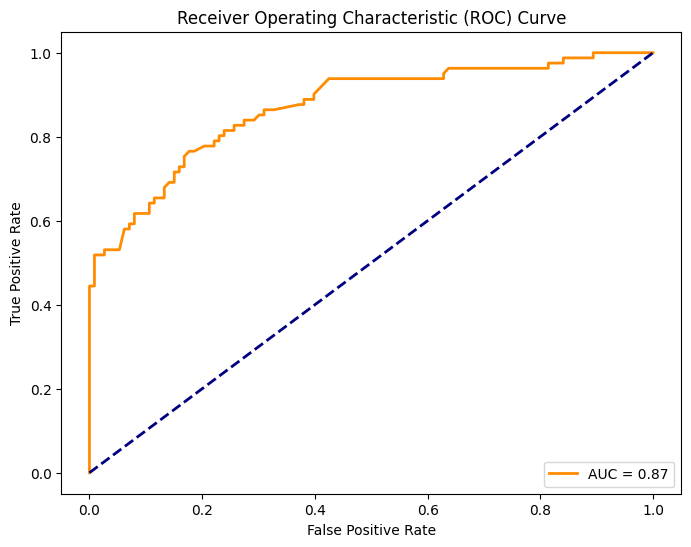

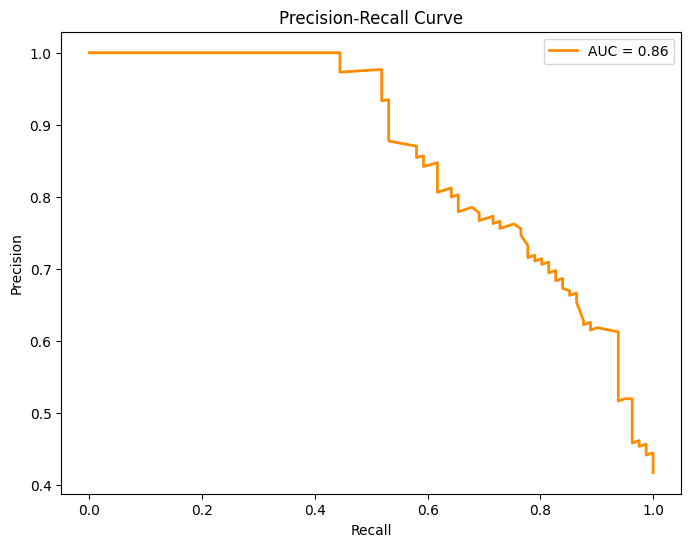

In [332]:
# Make predictions
y_pred = lgb_pipeline.predict(X_test)
y_proba = lgb_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Cat Boost Classifier

In [337]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-9, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-9, 10),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-9, 10),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.1, 10),
        'eval_metric': 'Logloss',
        # 'verbose':0,
        'random_seed': 42
    }
    
    numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex']

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
            ('numeric_scaler', RobustScaler(), numeric_features),
            ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
            ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
        ])

    catboost_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(**params))
        ])
    
    catboost_pipeline.fit(X_train, y_train)
    
    predictions = catboost_pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, predictions)
    
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best ROC AUC Score: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2023-12-10 02:45:32,099] A new study created in memory with name: no-name-a735cedd-07c1-4388-9044-2c2e01bdd996


0:	learn: 0.6922835	total: 1.7ms	remaining: 257ms
1:	learn: 0.6914425	total: 3.53ms	remaining: 265ms
2:	learn: 0.6905960	total: 4.65ms	remaining: 231ms
3:	learn: 0.6897404	total: 5.91ms	remaining: 219ms
4:	learn: 0.6889000	total: 7.06ms	remaining: 208ms
5:	learn: 0.6880455	total: 8.2ms	remaining: 200ms
6:	learn: 0.6872080	total: 10.6ms	remaining: 219ms
7:	learn: 0.6863684	total: 12.6ms	remaining: 227ms
8:	learn: 0.6855227	total: 13.6ms	remaining: 217ms
9:	learn: 0.6846990	total: 14.7ms	remaining: 208ms
10:	learn: 0.6838647	total: 15.8ms	remaining: 203ms
11:	learn: 0.6830278	total: 18ms	remaining: 210ms
12:	learn: 0.6822046	total: 19.2ms	remaining: 205ms
13:	learn: 0.6813797	total: 20.3ms	remaining: 200ms
14:	learn: 0.6805474	total: 22.3ms	remaining: 204ms
15:	learn: 0.6797207	total: 24.2ms	remaining: 206ms
16:	learn: 0.6788967	total: 25.5ms	remaining: 202ms
17:	learn: 0.6780775	total: 26.6ms	remaining: 198ms
18:	learn: 0.6772613	total: 27.6ms	remaining: 193ms
19:	learn: 0.6764474	total

[I 2023-12-10 02:45:33,087] Trial 0 finished with value: 0.8734841035725992 and parameters: {'iterations': 152, 'learning_rate': 0.0014631387482160034, 'depth': 5, 'random_strength': 8.783472719990923e-05, 'bagging_temperature': 1.1167133664895894, 'border_count': 156, 'l2_leaf_reg': 1.0341384013765297e-07, 'scale_pos_weight': 6.591619806083325}. Best is trial 0 with value: 0.8734841035725992.


0:	learn: 0.6736262	total: 67.5ms	remaining: 11.4s
1:	learn: 0.6554033	total: 90.9ms	remaining: 7.64s
2:	learn: 0.6384034	total: 111ms	remaining: 6.16s
3:	learn: 0.6226481	total: 133ms	remaining: 5.52s
4:	learn: 0.6079077	total: 165ms	remaining: 5.45s
5:	learn: 0.5942568	total: 185ms	remaining: 5.04s
6:	learn: 0.5798996	total: 209ms	remaining: 4.87s
7:	learn: 0.5667735	total: 233ms	remaining: 4.72s
8:	learn: 0.5552986	total: 245ms	remaining: 4.39s
9:	learn: 0.5441812	total: 258ms	remaining: 4.13s
10:	learn: 0.5336444	total: 267ms	remaining: 3.86s
11:	learn: 0.5230232	total: 281ms	remaining: 3.7s
12:	learn: 0.5140408	total: 298ms	remaining: 3.6s
13:	learn: 0.5053099	total: 324ms	remaining: 3.61s
14:	learn: 0.4969965	total: 350ms	remaining: 3.61s
15:	learn: 0.4878727	total: 373ms	remaining: 3.59s
16:	learn: 0.4799523	total: 392ms	remaining: 3.53s
17:	learn: 0.4722327	total: 412ms	remaining: 3.48s
18:	learn: 0.4650927	total: 427ms	remaining: 3.39s
19:	learn: 0.4585226	total: 442ms	remaini

[I 2023-12-10 02:45:35,817] Trial 1 finished with value: 0.8518518518518517 and parameters: {'iterations': 170, 'learning_rate': 0.04152724178994595, 'depth': 9, 'random_strength': 1.3486836261526739e-06, 'bagging_temperature': 0.5355216828100537, 'border_count': 225, 'l2_leaf_reg': 0.23041579302341278, 'scale_pos_weight': 1.0294396447029202}. Best is trial 0 with value: 0.8734841035725992.


0:	learn: 0.6825901	total: 3.19ms	remaining: 542ms
1:	learn: 0.6740831	total: 4.45ms	remaining: 376ms
2:	learn: 0.6654394	total: 6.36ms	remaining: 356ms
3:	learn: 0.6561633	total: 8.01ms	remaining: 334ms
4:	learn: 0.6484190	total: 9.06ms	remaining: 301ms
5:	learn: 0.6415977	total: 11.3ms	remaining: 310ms
6:	learn: 0.6349372	total: 14.2ms	remaining: 333ms
7:	learn: 0.6283191	total: 16ms	remaining: 325ms
8:	learn: 0.6210782	total: 22.2ms	remaining: 400ms
9:	learn: 0.6171367	total: 23.7ms	remaining: 382ms
10:	learn: 0.6146130	total: 25.4ms	remaining: 369ms
11:	learn: 0.6100573	total: 26.9ms	remaining: 357ms
12:	learn: 0.6039828	total: 28.4ms	remaining: 345ms
13:	learn: 0.5982770	total: 29.9ms	remaining: 335ms
14:	learn: 0.5950757	total: 34.5ms	remaining: 358ms
15:	learn: 0.5894092	total: 36.2ms	remaining: 350ms
16:	learn: 0.5851564	total: 37.8ms	remaining: 342ms
17:	learn: 0.5788190	total: 39.4ms	remaining: 335ms
18:	learn: 0.5730365	total: 41ms	remaining: 328ms
19:	learn: 0.5701046	total

[I 2023-12-10 02:45:36,394] Trial 2 finished with value: 0.876980225062821 and parameters: {'iterations': 171, 'learning_rate': 0.02709454178789608, 'depth': 6, 'random_strength': 4.899490543063652, 'bagging_temperature': 0.09933272017163035, 'border_count': 158, 'l2_leaf_reg': 0.0004785543937172858, 'scale_pos_weight': 1.2771552543756926}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6718493	total: 6.85ms	remaining: 1.31s
1:	learn: 0.6528004	total: 14.4ms	remaining: 1.37s
2:	learn: 0.6342245	total: 21.6ms	remaining: 1.36s
3:	learn: 0.6170564	total: 27.4ms	remaining: 1.29s
4:	learn: 0.6008226	total: 34.3ms	remaining: 1.28s
5:	learn: 0.5863582	total: 40ms	remaining: 1.24s
6:	learn: 0.5724228	total: 46.1ms	remaining: 1.22s
7:	learn: 0.5587067	total: 53.6ms	remaining: 1.23s
8:	learn: 0.5464562	total: 59.6ms	remaining: 1.21s
9:	learn: 0.5343080	total: 66.5ms	remaining: 1.21s
10:	learn: 0.5238386	total: 72.5ms	remaining: 1.19s
11:	learn: 0.5133802	total: 78.2ms	remaining: 1.17s
12:	learn: 0.5028059	total: 85.4ms	remaining: 1.18s
13:	learn: 0.4931390	total: 90.6ms	remaining: 1.15s
14:	learn: 0.4842000	total: 95.8ms	remaining: 1.13s
15:	learn: 0.4749974	total: 103ms	remaining: 1.13s
16:	learn: 0.4671498	total: 109ms	remaining: 1.12s
17:	learn: 0.4588999	total: 115ms	remaining: 1.11s
18:	learn: 0.4513328	total: 121ms	remaining: 1.1s
19:	learn: 0.4438693	total: 1

[I 2023-12-10 02:45:38,139] Trial 3 finished with value: 0.8421282639571726 and parameters: {'iterations': 192, 'learning_rate': 0.03745865854200204, 'depth': 9, 'random_strength': 2.7661804997199324e-07, 'bagging_temperature': 1.8629082930849973e-05, 'border_count': 114, 'l2_leaf_reg': 0.001856632728484931, 'scale_pos_weight': 0.890289692044388}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6918933	total: 14.4ms	remaining: 2.67s
1:	learn: 0.6906175	total: 29.6ms	remaining: 2.74s
2:	learn: 0.6894109	total: 45.2ms	remaining: 2.77s
3:	learn: 0.6881362	total: 59ms	remaining: 2.7s
4:	learn: 0.6869688	total: 73.3ms	remaining: 2.67s
5:	learn: 0.6857446	total: 87ms	remaining: 2.63s
6:	learn: 0.6845225	total: 114ms	remaining: 2.92s
7:	learn: 0.6832618	total: 128ms	remaining: 2.87s
8:	learn: 0.6821023	total: 145ms	remaining: 2.88s
9:	learn: 0.6809447	total: 159ms	remaining: 2.81s
10:	learn: 0.6797792	total: 178ms	remaining: 2.85s
11:	learn: 0.6785688	total: 197ms	remaining: 2.87s
12:	learn: 0.6774708	total: 217ms	remaining: 2.9s
13:	learn: 0.6763000	total: 235ms	remaining: 2.9s
14:	learn: 0.6751008	total: 249ms	remaining: 2.85s
15:	learn: 0.6739359	total: 261ms	remaining: 2.79s
16:	learn: 0.6727640	total: 272ms	remaining: 2.71s
17:	learn: 0.6715814	total: 284ms	remaining: 2.66s
18:	learn: 0.6703961	total: 296ms	remaining: 2.61s
19:	learn: 0.6692783	total: 307ms	remainin

[I 2023-12-10 02:45:41,679] Trial 4 finished with value: 0.8362831858407079 and parameters: {'iterations': 187, 'learning_rate': 0.0018619140494597747, 'depth': 10, 'random_strength': 2.0263704205758816e-09, 'bagging_temperature': 0.08891405723181744, 'border_count': 128, 'l2_leaf_reg': 1.45051343191441e-08, 'scale_pos_weight': 5.183850493496782}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6887961	total: 14.1ms	remaining: 1.55s
1:	learn: 0.6844983	total: 24.1ms	remaining: 1.31s
2:	learn: 0.6803467	total: 35.1ms	remaining: 1.26s
3:	learn: 0.6761813	total: 45.4ms	remaining: 1.22s
4:	learn: 0.6721797	total: 55ms	remaining: 1.17s
5:	learn: 0.6681497	total: 64.8ms	remaining: 1.13s
6:	learn: 0.6645093	total: 74.5ms	remaining: 1.11s
7:	learn: 0.6604661	total: 84.9ms	remaining: 1.09s
8:	learn: 0.6565735	total: 95.3ms	remaining: 1.08s
9:	learn: 0.6528234	total: 105ms	remaining: 1.06s
10:	learn: 0.6489880	total: 115ms	remaining: 1.04s
11:	learn: 0.6452213	total: 124ms	remaining: 1.02s
12:	learn: 0.6418275	total: 135ms	remaining: 1.02s
13:	learn: 0.6382639	total: 147ms	remaining: 1.02s
14:	learn: 0.6345584	total: 157ms	remaining: 1s
15:	learn: 0.6309381	total: 167ms	remaining: 992ms
16:	learn: 0.6276182	total: 179ms	remaining: 989ms
17:	learn: 0.6241744	total: 188ms	remaining: 972ms
18:	learn: 0.6206732	total: 198ms	remaining: 960ms
19:	learn: 0.6173499	total: 209ms	rem

[I 2023-12-10 02:45:43,581] Trial 5 finished with value: 0.8363924396372773 and parameters: {'iterations': 111, 'learning_rate': 0.007171640884547113, 'depth': 10, 'random_strength': 6.318476579791973e-06, 'bagging_temperature': 0.00032966571323565623, 'border_count': 113, 'l2_leaf_reg': 3.128600833626827e-07, 'scale_pos_weight': 3.1239408347059703}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6922541	total: 3.61ms	remaining: 238ms
1:	learn: 0.6912859	total: 16.5ms	remaining: 536ms
2:	learn: 0.6903094	total: 25.2ms	remaining: 537ms
3:	learn: 0.6894197	total: 31.6ms	remaining: 497ms
4:	learn: 0.6885112	total: 40.9ms	remaining: 507ms
5:	learn: 0.6876136	total: 46.8ms	remaining: 476ms
6:	learn: 0.6868089	total: 52.5ms	remaining: 450ms
7:	learn: 0.6859652	total: 54.3ms	remaining: 400ms
8:	learn: 0.6851802	total: 66.6ms	remaining: 429ms
9:	learn: 0.6843139	total: 72ms	remaining: 411ms
10:	learn: 0.6834071	total: 87.1ms	remaining: 444ms
11:	learn: 0.6825871	total: 87.8ms	remaining: 402ms
12:	learn: 0.6817495	total: 89ms	remaining: 370ms
13:	learn: 0.6808685	total: 101ms	remaining: 381ms
14:	learn: 0.6799449	total: 116ms	remaining: 402ms
15:	learn: 0.6791595	total: 117ms	remaining: 372ms
16:	learn: 0.6782540	total: 129ms	remaining: 378ms
17:	learn: 0.6775054	total: 130ms	remaining: 353ms
18:	learn: 0.6766860	total: 133ms	remaining: 335ms
19:	learn: 0.6758662	total: 134m

[I 2023-12-10 02:45:44,343] Trial 6 finished with value: 0.873702611165738 and parameters: {'iterations': 67, 'learning_rate': 0.0015713118018807727, 'depth': 9, 'random_strength': 0.6066920580600578, 'bagging_temperature': 0.013421507673024066, 'border_count': 206, 'l2_leaf_reg': 0.03636198312250922, 'scale_pos_weight': 7.042182898878571}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6564629	total: 1.92ms	remaining: 192ms
1:	learn: 0.6265943	total: 3.64ms	remaining: 180ms
2:	learn: 0.5985614	total: 4.95ms	remaining: 162ms
3:	learn: 0.5751271	total: 8.54ms	remaining: 207ms
4:	learn: 0.5552910	total: 11.9ms	remaining: 228ms
5:	learn: 0.5369415	total: 15.4ms	remaining: 243ms
6:	learn: 0.5194742	total: 16.6ms	remaining: 223ms
7:	learn: 0.5050569	total: 17.9ms	remaining: 208ms
8:	learn: 0.4922850	total: 19.3ms	remaining: 197ms
9:	learn: 0.4812546	total: 20.6ms	remaining: 188ms
10:	learn: 0.4712818	total: 29ms	remaining: 237ms
11:	learn: 0.4618869	total: 31.6ms	remaining: 235ms
12:	learn: 0.4514483	total: 33.5ms	remaining: 226ms
13:	learn: 0.4435986	total: 35.2ms	remaining: 218ms
14:	learn: 0.4361031	total: 44.4ms	remaining: 255ms
15:	learn: 0.4261965	total: 45.7ms	remaining: 243ms
16:	learn: 0.4196462	total: 46.8ms	remaining: 231ms
17:	learn: 0.4138341	total: 47.9ms	remaining: 221ms
18:	learn: 0.4067995	total: 49.1ms	remaining: 212ms
19:	learn: 0.3995718	tot

[I 2023-12-10 02:45:44,920] Trial 7 finished with value: 0.8548017043592264 and parameters: {'iterations': 101, 'learning_rate': 0.07962710319502961, 'depth': 7, 'random_strength': 1.4284749737157754e-08, 'bagging_temperature': 1.4479455934492176e-08, 'border_count': 16, 'l2_leaf_reg': 0.0004272988492818786, 'scale_pos_weight': 1.5997121610658167}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6722518	total: 3.06ms	remaining: 386ms
1:	learn: 0.6522303	total: 5.53ms	remaining: 346ms
2:	learn: 0.6328916	total: 10.3ms	remaining: 427ms
3:	learn: 0.6137338	total: 15.9ms	remaining: 489ms
4:	learn: 0.5975665	total: 18.2ms	remaining: 443ms
5:	learn: 0.5810005	total: 20.4ms	remaining: 411ms
6:	learn: 0.5649415	total: 23ms	remaining: 394ms
7:	learn: 0.5516316	total: 31.1ms	remaining: 463ms
8:	learn: 0.5380759	total: 33.3ms	remaining: 437ms
9:	learn: 0.5259039	total: 35.5ms	remaining: 415ms
10:	learn: 0.5143436	total: 37.9ms	remaining: 400ms
11:	learn: 0.5028526	total: 43ms	remaining: 412ms
12:	learn: 0.4924511	total: 46.4ms	remaining: 407ms
13:	learn: 0.4816675	total: 52.5ms	remaining: 424ms
14:	learn: 0.4733977	total: 60ms	remaining: 448ms
15:	learn: 0.4654681	total: 63.7ms	remaining: 442ms
16:	learn: 0.4562934	total: 65.9ms	remaining: 427ms
17:	learn: 0.4475807	total: 68.2ms	remaining: 413ms
18:	learn: 0.4392165	total: 70.5ms	remaining: 400ms
19:	learn: 0.4318394	total: 

[I 2023-12-10 02:45:45,685] Trial 8 finished with value: 0.8430569212280126 and parameters: {'iterations': 127, 'learning_rate': 0.046993939230068664, 'depth': 7, 'random_strength': 0.00011008920892609098, 'bagging_temperature': 0.00023828618196377037, 'border_count': 127, 'l2_leaf_reg': 3.0433514013544065, 'scale_pos_weight': 8.9447484341864}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6908391	total: 1.67ms	remaining: 138ms
1:	learn: 0.6886158	total: 3.2ms	remaining: 131ms
2:	learn: 0.6863791	total: 4.46ms	remaining: 120ms
3:	learn: 0.6843485	total: 5.14ms	remaining: 103ms
4:	learn: 0.6824644	total: 5.82ms	remaining: 91.9ms
5:	learn: 0.6802874	total: 6.99ms	remaining: 90.9ms
6:	learn: 0.6781542	total: 8.69ms	remaining: 95.6ms
7:	learn: 0.6760633	total: 10.5ms	remaining: 99.5ms
8:	learn: 0.6741067	total: 11.8ms	remaining: 97.9ms
9:	learn: 0.6721954	total: 12.4ms	remaining: 92ms
10:	learn: 0.6701152	total: 13.7ms	remaining: 90.7ms
11:	learn: 0.6682563	total: 14.1ms	remaining: 84.9ms
12:	learn: 0.6664327	total: 15.4ms	remaining: 84.3ms
13:	learn: 0.6643922	total: 16.7ms	remaining: 83.3ms
14:	learn: 0.6623149	total: 17.8ms	remaining: 82.1ms
15:	learn: 0.6605252	total: 18.7ms	remaining: 79.4ms
16:	learn: 0.6586769	total: 19.6ms	remaining: 77.2ms
17:	learn: 0.6567083	total: 20.9ms	remaining: 76.5ms
18:	learn: 0.6549788	total: 21.5ms	remaining: 73.5ms
19:	learn:

[I 2023-12-10 02:45:46,058] Trial 9 finished with value: 0.8753414181142795 and parameters: {'iterations': 84, 'learning_rate': 0.0036586658015030195, 'depth': 6, 'random_strength': 0.9009396445511816, 'bagging_temperature': 0.09120808752856277, 'border_count': 83, 'l2_leaf_reg': 5.823104416363021e-05, 'scale_pos_weight': 8.76950719702481}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6862550	total: 1.26ms	remaining: 178ms
1:	learn: 0.6795538	total: 2.97ms	remaining: 208ms
2:	learn: 0.6732538	total: 6ms	remaining: 278ms
3:	learn: 0.6670260	total: 7.86ms	remaining: 271ms
4:	learn: 0.6610494	total: 9.09ms	remaining: 249ms
5:	learn: 0.6550887	total: 9.93ms	remaining: 225ms
6:	learn: 0.6493932	total: 13ms	remaining: 252ms
7:	learn: 0.6438819	total: 13.9ms	remaining: 234ms
8:	learn: 0.6386415	total: 14.8ms	remaining: 218ms
9:	learn: 0.6333299	total: 15.8ms	remaining: 209ms
10:	learn: 0.6283177	total: 17.5ms	remaining: 208ms
11:	learn: 0.6233754	total: 21ms	remaining: 228ms
12:	learn: 0.6184861	total: 22.5ms	remaining: 223ms
13:	learn: 0.6137360	total: 23.4ms	remaining: 214ms
14:	learn: 0.6091899	total: 25.4ms	remaining: 215ms
15:	learn: 0.6046961	total: 26.7ms	remaining: 210ms
16:	learn: 0.6003732	total: 27.8ms	remaining: 205ms
17:	learn: 0.5963412	total: 28.7ms	remaining: 198ms
18:	learn: 0.5923566	total: 29.6ms	remaining: 191ms
19:	learn: 0.5882900	total: 3

[I 2023-12-10 02:45:46,635] Trial 10 finished with value: 0.873320222877745 and parameters: {'iterations': 142, 'learning_rate': 0.015821045554707827, 'depth': 4, 'random_strength': 0.016444673818232957, 'bagging_temperature': 4.973762341160732, 'border_count': 176, 'l2_leaf_reg': 6.643171863262772e-06, 'scale_pos_weight': 2.9892430031091517}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6896533	total: 2.28ms	remaining: 148ms
1:	learn: 0.6864816	total: 5.35ms	remaining: 171ms
2:	learn: 0.6830609	total: 8.4ms	remaining: 176ms
3:	learn: 0.6799613	total: 9.26ms	remaining: 144ms
4:	learn: 0.6770649	total: 10.1ms	remaining: 123ms
5:	learn: 0.6739583	total: 11.6ms	remaining: 116ms
6:	learn: 0.6709773	total: 12.8ms	remaining: 108ms
7:	learn: 0.6678279	total: 13.9ms	remaining: 101ms
8:	learn: 0.6648939	total: 15.1ms	remaining: 95.8ms
9:	learn: 0.6619991	total: 16ms	remaining: 89.5ms
10:	learn: 0.6589321	total: 17.3ms	remaining: 86.3ms
11:	learn: 0.6561466	total: 17.7ms	remaining: 79.9ms
12:	learn: 0.6534178	total: 23.7ms	remaining: 96.8ms
13:	learn: 0.6504322	total: 24.9ms	remaining: 92.6ms
14:	learn: 0.6475853	total: 26.3ms	remaining: 89.5ms
15:	learn: 0.6449274	total: 27.3ms	remaining: 85.4ms
16:	learn: 0.6421430	total: 28.5ms	remaining: 82.1ms
17:	learn: 0.6394409	total: 30.3ms	remaining: 80.7ms
18:	learn: 0.6367186	total: 31.5ms	remaining: 77.9ms
19:	learn: 0.6

[I 2023-12-10 02:45:47,100] Trial 11 finished with value: 0.8596634983065661 and parameters: {'iterations': 66, 'learning_rate': 0.005463939480342921, 'depth': 6, 'random_strength': 9.103877624734308, 'bagging_temperature': 0.011023104062767923, 'border_count': 60, 'l2_leaf_reg': 3.318579746972371e-05, 'scale_pos_weight': 9.48146649730227}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6865361	total: 1.68ms	remaining: 151ms
1:	learn: 0.6801345	total: 3.16ms	remaining: 141ms
2:	learn: 0.6738607	total: 4.34ms	remaining: 127ms
3:	learn: 0.6678968	total: 5.48ms	remaining: 119ms
4:	learn: 0.6618196	total: 6.6ms	remaining: 114ms
5:	learn: 0.6558880	total: 7.81ms	remaining: 111ms
6:	learn: 0.6503719	total: 8.97ms	remaining: 108ms
7:	learn: 0.6450750	total: 10.2ms	remaining: 105ms
8:	learn: 0.6395262	total: 13.1ms	remaining: 119ms
9:	learn: 0.6341887	total: 14.9ms	remaining: 121ms
10:	learn: 0.6289435	total: 16.1ms	remaining: 117ms
11:	learn: 0.6237092	total: 17.5ms	remaining: 115ms
12:	learn: 0.6188407	total: 18.6ms	remaining: 112ms
13:	learn: 0.6141665	total: 19.9ms	remaining: 109ms
14:	learn: 0.6092206	total: 21.1ms	remaining: 107ms
15:	learn: 0.6044090	total: 22.3ms	remaining: 105ms
16:	learn: 0.5997200	total: 23.5ms	remaining: 102ms
17:	learn: 0.5953020	total: 24.7ms	remaining: 100ms
18:	learn: 0.5909534	total: 26.8ms	remaining: 102ms
19:	learn: 0.5868198	to

[I 2023-12-10 02:45:47,608] Trial 12 finished with value: 0.8623402163225172 and parameters: {'iterations': 91, 'learning_rate': 0.013264415993217107, 'depth': 6, 'random_strength': 0.09780314415591972, 'bagging_temperature': 3.4838245269575543, 'border_count': 69, 'l2_leaf_reg': 0.0015833077469827918, 'scale_pos_weight': 3.828757009833644}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6909334	total: 1.08ms	remaining: 56.1ms
1:	learn: 0.6887157	total: 3.26ms	remaining: 83.2ms
2:	learn: 0.6865725	total: 4.42ms	remaining: 73.7ms
3:	learn: 0.6844740	total: 5.36ms	remaining: 65.7ms
4:	learn: 0.6825966	total: 6.21ms	remaining: 59.6ms
5:	learn: 0.6807404	total: 7.12ms	remaining: 55.7ms
6:	learn: 0.6788644	total: 7.79ms	remaining: 51.2ms
7:	learn: 0.6770039	total: 8.65ms	remaining: 48.7ms
8:	learn: 0.6749780	total: 9.68ms	remaining: 47.3ms
9:	learn: 0.6731189	total: 10.8ms	remaining: 46.2ms
10:	learn: 0.6713961	total: 11.7ms	remaining: 44.8ms
11:	learn: 0.6696891	total: 13.8ms	remaining: 47ms
12:	learn: 0.6678616	total: 14.8ms	remaining: 45.6ms
13:	learn: 0.6661901	total: 15.4ms	remaining: 43ms
14:	learn: 0.6644900	total: 16.9ms	remaining: 42.9ms
15:	learn: 0.6625106	total: 18.2ms	remaining: 42.1ms
16:	learn: 0.6605261	total: 19.2ms	remaining: 40.6ms
17:	learn: 0.6587834	total: 20ms	remaining: 38.9ms
18:	learn: 0.6570941	total: 20.9ms	remaining: 37.4ms
19:	learn

[I 2023-12-10 02:45:48,023] Trial 13 finished with value: 0.8703703703703703 and parameters: {'iterations': 53, 'learning_rate': 0.0037623428124307747, 'depth': 5, 'random_strength': 4.440514199493599, 'bagging_temperature': 0.03929308532550521, 'border_count': 76, 'l2_leaf_reg': 7.520061514155822e-06, 'scale_pos_weight': 7.757068932243406}. Best is trial 2 with value: 0.876980225062821.
[I 2023-12-10 02:45:48,404] Trial 14 finished with value: 0.850267671801595 and parameters: {'iterations': 82, 'learning_rate': 0.017383933494526355, 'depth': 6, 'random_strength': 0.017711152247699202, 'bagging_temperature': 0.0029113895691888518, 'border_count': 2, 'l2_leaf_reg': 0.00011695280718596092, 'scale_pos_weight': 0.2636387142348926}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6810422	total: 1.01ms	remaining: 81.5ms
1:	learn: 0.6693788	total: 2.1ms	remaining: 84.1ms
2:	learn: 0.6580444	total: 2.88ms	remaining: 75.9ms
3:	learn: 0.6472199	total: 3.68ms	remaining: 71.8ms
4:	learn: 0.6367539	total: 4.43ms	remaining: 68.2ms
5:	learn: 0.6264909	total: 5.13ms	remaining: 65ms
6:	learn: 0.6166811	total: 5.88ms	remaining: 63ms
7:	learn: 0.6070606	total: 6.64ms	remaining: 61.4ms
8:	learn: 0.5977454	total: 7.35ms	remaining: 59.6ms
9:	learn: 0.5887702	total: 8.11ms	remaining: 58.4ms
10:	learn: 0.5800395	total: 8.86ms	remaining: 57.2ms
11:	learn: 0.5715784	total: 9.55ms	remaining: 55.7ms
12:	learn: 0.5633930	total: 10.3ms	remaining: 54.5ms
13:	learn: 0.5555066	total: 10.9ms	remaining: 53ms
14:	learn: 0.5477530	total: 11.9ms	remaining: 53.3ms
15:	learn: 0.5403473	total: 13.5ms	remaining: 55.7ms
16:	learn: 0.5332178	total: 14.3ms	remaining: 54.7ms
17:	learn: 0.5261998	total: 15.1ms	remaining: 53.6ms
18:	learn: 0.5193905	total: 15.9ms	remaining: 52.6ms
19:	learn:

[I 2023-12-10 02:45:49,599] Trial 15 finished with value: 0.8702611165738009 and parameters: {'iterations': 163, 'learning_rate': 0.003266911668638992, 'depth': 8, 'random_strength': 0.5271803553691427, 'bagging_temperature': 0.23488566577403017, 'border_count': 165, 'l2_leaf_reg': 0.011063231945632296, 'scale_pos_weight': 9.947471752102388}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6882751	total: 1.06ms	remaining: 131ms
1:	learn: 0.6833745	total: 2.24ms	remaining: 136ms
2:	learn: 0.6786346	total: 3.04ms	remaining: 123ms
3:	learn: 0.6738779	total: 3.9ms	remaining: 117ms
4:	learn: 0.6692519	total: 4.75ms	remaining: 113ms
5:	learn: 0.6646622	total: 5.56ms	remaining: 109ms
6:	learn: 0.6601711	total: 6.43ms	remaining: 108ms
7:	learn: 0.6558527	total: 7.53ms	remaining: 109ms
8:	learn: 0.6515011	total: 9.65ms	remaining: 123ms
9:	learn: 0.6472573	total: 10.5ms	remaining: 120ms
10:	learn: 0.6430895	total: 11.3ms	remaining: 116ms
11:	learn: 0.6389588	total: 12.1ms	remaining: 113ms
12:	learn: 0.6348781	total: 12.9ms	remaining: 110ms
13:	learn: 0.6309122	total: 13.7ms	remaining: 108ms
14:	learn: 0.6269831	total: 14.5ms	remaining: 105ms
15:	learn: 0.6231901	total: 15.3ms	remaining: 103ms
16:	learn: 0.6194138	total: 16.1ms	remaining: 101ms
17:	learn: 0.6156921	total: 16.9ms	remaining: 99.5ms
18:	learn: 0.6120702	total: 17.7ms	remaining: 97.6ms
19:	learn: 0.6084310	

[I 2023-12-10 02:45:50,044] Trial 16 finished with value: 0.8628318584070797 and parameters: {'iterations': 124, 'learning_rate': 0.009393572935573248, 'depth': 4, 'random_strength': 0.004053871130774926, 'bagging_temperature': 8.750684855931876, 'border_count': 200, 'l2_leaf_reg': 2.2969357861083214e-09, 'scale_pos_weight': 5.500457209410516}. Best is trial 2 with value: 0.876980225062821.


0:	learn: 0.6798270	total: 2.14ms	remaining: 289ms
1:	learn: 0.6666392	total: 3.67ms	remaining: 246ms
2:	learn: 0.6546005	total: 4.79ms	remaining: 212ms
3:	learn: 0.6429908	total: 5.85ms	remaining: 193ms
4:	learn: 0.6328187	total: 6.96ms	remaining: 182ms
5:	learn: 0.6228566	total: 8.08ms	remaining: 175ms
6:	learn: 0.6133537	total: 8.94ms	remaining: 165ms
7:	learn: 0.6043852	total: 10ms	remaining: 160ms
8:	learn: 0.5947393	total: 11.4ms	remaining: 161ms
9:	learn: 0.5864651	total: 14.5ms	remaining: 182ms
10:	learn: 0.5788381	total: 15.8ms	remaining: 180ms
11:	learn: 0.5715312	total: 17ms	remaining: 175ms
12:	learn: 0.5639101	total: 18.1ms	remaining: 171ms
13:	learn: 0.5572418	total: 18.7ms	remaining: 163ms
14:	learn: 0.5506319	total: 19.8ms	remaining: 160ms
15:	learn: 0.5430060	total: 21ms	remaining: 157ms
16:	learn: 0.5354381	total: 22.1ms	remaining: 154ms
17:	learn: 0.5291457	total: 23.2ms	remaining: 152ms
18:	learn: 0.5234184	total: 24.2ms	remaining: 149ms
19:	learn: 0.5178774	total: 

[I 2023-12-10 02:45:50,525] Trial 17 finished with value: 0.8770348519611056 and parameters: {'iterations': 136, 'learning_rate': 0.02247212161788612, 'depth': 5, 'random_strength': 7.175952064207605, 'bagging_temperature': 0.13100717278255034, 'border_count': 243, 'l2_leaf_reg': 2.29502676440103e-06, 'scale_pos_weight': 8.483783543329203}. Best is trial 17 with value: 0.8770348519611056.


0:	learn: 0.6825480	total: 1.44ms	remaining: 249ms
1:	learn: 0.6717814	total: 3ms	remaining: 258ms
2:	learn: 0.6624954	total: 4.11ms	remaining: 234ms
3:	learn: 0.6535927	total: 4.92ms	remaining: 209ms
4:	learn: 0.6448893	total: 6.07ms	remaining: 205ms
5:	learn: 0.6364519	total: 7.16ms	remaining: 201ms
6:	learn: 0.6305575	total: 7.85ms	remaining: 187ms
7:	learn: 0.6246151	total: 10.3ms	remaining: 213ms
8:	learn: 0.6187489	total: 11.6ms	remaining: 212ms
9:	learn: 0.6131772	total: 12.9ms	remaining: 211ms
10:	learn: 0.6073082	total: 14ms	remaining: 208ms
11:	learn: 0.6007930	total: 14.7ms	remaining: 198ms
12:	learn: 0.5960749	total: 15.8ms	remaining: 195ms
13:	learn: 0.5916050	total: 16.3ms	remaining: 187ms
14:	learn: 0.5850428	total: 17.5ms	remaining: 185ms
15:	learn: 0.5810111	total: 18.8ms	remaining: 186ms
16:	learn: 0.5771833	total: 19.9ms	remaining: 183ms
17:	learn: 0.5711271	total: 21ms	remaining: 182ms
18:	learn: 0.5652868	total: 22.2ms	remaining: 181ms
19:	learn: 0.5594184	total: 2

[I 2023-12-10 02:45:51,160] Trial 18 finished with value: 0.8790560471976401 and parameters: {'iterations': 174, 'learning_rate': 0.02404152834113177, 'depth': 5, 'random_strength': 3.0588685088890917, 'bagging_temperature': 0.0023502306619237663, 'border_count': 254, 'l2_leaf_reg': 1.1724746337146965e-06, 'scale_pos_weight': 4.357169891790159}. Best is trial 18 with value: 0.8790560471976401.


0:	learn: 0.6816138	total: 1.56ms	remaining: 218ms
1:	learn: 0.6703275	total: 3.09ms	remaining: 213ms
2:	learn: 0.6596714	total: 4.29ms	remaining: 196ms
3:	learn: 0.6489078	total: 5.36ms	remaining: 182ms
4:	learn: 0.6384072	total: 6.54ms	remaining: 177ms
5:	learn: 0.6284540	total: 9.56ms	remaining: 213ms
6:	learn: 0.6189987	total: 11ms	remaining: 208ms
7:	learn: 0.6100143	total: 12.1ms	remaining: 199ms
8:	learn: 0.6017179	total: 13.2ms	remaining: 192ms
9:	learn: 0.5933529	total: 14.4ms	remaining: 188ms
10:	learn: 0.5852590	total: 15.6ms	remaining: 183ms
11:	learn: 0.5774268	total: 16.8ms	remaining: 179ms
12:	learn: 0.5699110	total: 17.9ms	remaining: 175ms
13:	learn: 0.5629688	total: 19.1ms	remaining: 172ms
14:	learn: 0.5560989	total: 20.3ms	remaining: 169ms
15:	learn: 0.5496307	total: 21.3ms	remaining: 165ms
16:	learn: 0.5437989	total: 24.8ms	remaining: 179ms
17:	learn: 0.5376315	total: 26.8ms	remaining: 182ms
18:	learn: 0.5313991	total: 28.4ms	remaining: 181ms
19:	learn: 0.5253235	tot

[I 2023-12-10 02:45:51,734] Trial 19 finished with value: 0.8620670818310937 and parameters: {'iterations': 140, 'learning_rate': 0.022129440135355786, 'depth': 5, 'random_strength': 0.12334128306394056, 'bagging_temperature': 1.6787790356787037e-05, 'border_count': 253, 'l2_leaf_reg': 8.548972803937911e-07, 'scale_pos_weight': 5.901346703947078}. Best is trial 18 with value: 0.8790560471976401.


126:	learn: 0.3119745	total: 182ms	remaining: 18.6ms
127:	learn: 0.3111956	total: 184ms	remaining: 17.2ms
128:	learn: 0.3105234	total: 185ms	remaining: 15.8ms
129:	learn: 0.3097154	total: 187ms	remaining: 14.4ms
130:	learn: 0.3090530	total: 188ms	remaining: 12.9ms
131:	learn: 0.3085340	total: 190ms	remaining: 11.5ms
132:	learn: 0.3077994	total: 191ms	remaining: 10ms
133:	learn: 0.3072796	total: 192ms	remaining: 8.59ms
134:	learn: 0.3065671	total: 193ms	remaining: 7.14ms
135:	learn: 0.3059910	total: 194ms	remaining: 5.71ms
136:	learn: 0.3055743	total: 195ms	remaining: 4.27ms
137:	learn: 0.3049210	total: 196ms	remaining: 2.85ms
138:	learn: 0.3045613	total: 198ms	remaining: 1.43ms
139:	learn: 0.3041325	total: 199ms	remaining: 0us
0:	learn: 0.6856640	total: 1.08ms	remaining: 201ms
1:	learn: 0.6782619	total: 2.24ms	remaining: 207ms
2:	learn: 0.6710171	total: 4.28ms	remaining: 262ms
3:	learn: 0.6639978	total: 5.66ms	remaining: 259ms
4:	learn: 0.6571322	total: 6.51ms	remaining: 237ms
5:	learn

[I 2023-12-10 02:45:52,274] Trial 20 finished with value: 0.8413634873811865 and parameters: {'iterations': 187, 'learning_rate': 0.012472613055050968, 'depth': 4, 'random_strength': 0.0013120899098176349, 'bagging_temperature': 0.001107423608919647, 'border_count': 254, 'l2_leaf_reg': 1.8385095071957766e-06, 'scale_pos_weight': 7.949448710434154}. Best is trial 18 with value: 0.8790560471976401.


0:	learn: 0.6812126	total: 1.63ms	remaining: 276ms
1:	learn: 0.6691586	total: 3.11ms	remaining: 261ms
2:	learn: 0.6588052	total: 4.21ms	remaining: 234ms
3:	learn: 0.6489295	total: 5.1ms	remaining: 212ms
4:	learn: 0.6393306	total: 6.21ms	remaining: 205ms
5:	learn: 0.6319635	total: 7.3ms	remaining: 199ms
6:	learn: 0.6254839	total: 7.75ms	remaining: 181ms
7:	learn: 0.6189870	total: 9.17ms	remaining: 186ms
8:	learn: 0.6125954	total: 10.4ms	remaining: 185ms
9:	learn: 0.6065496	total: 11.8ms	remaining: 190ms
10:	learn: 0.6002054	total: 13.9ms	remaining: 202ms
11:	learn: 0.5921527	total: 15.2ms	remaining: 200ms
12:	learn: 0.5878785	total: 16.2ms	remaining: 196ms
13:	learn: 0.5827466	total: 17.3ms	remaining: 193ms
14:	learn: 0.5758180	total: 18.4ms	remaining: 191ms
15:	learn: 0.5714610	total: 19ms	remaining: 183ms
16:	learn: 0.5661163	total: 20.2ms	remaining: 182ms
17:	learn: 0.5594393	total: 21.4ms	remaining: 181ms
18:	learn: 0.5538492	total: 22.2ms	remaining: 176ms
19:	learn: 0.5503029	total

[I 2023-12-10 02:45:52,833] Trial 21 finished with value: 0.8754506719108489 and parameters: {'iterations': 170, 'learning_rate': 0.02690573113273009, 'depth': 5, 'random_strength': 8.928023274256224, 'bagging_temperature': 0.004807594616461184, 'border_count': 223, 'l2_leaf_reg': 1.2365395576896518e-07, 'scale_pos_weight': 4.4286786466542205}. Best is trial 18 with value: 0.8790560471976401.


152:	learn: 0.3774276	total: 184ms	remaining: 20.4ms
153:	learn: 0.3770781	total: 186ms	remaining: 19.3ms
154:	learn: 0.3770290	total: 187ms	remaining: 18.1ms
155:	learn: 0.3765652	total: 188ms	remaining: 16.9ms
156:	learn: 0.3764680	total: 189ms	remaining: 15.7ms
157:	learn: 0.3763125	total: 192ms	remaining: 14.5ms
158:	learn: 0.3758627	total: 193ms	remaining: 13.3ms
159:	learn: 0.3754279	total: 194ms	remaining: 12.1ms
160:	learn: 0.3751000	total: 196ms	remaining: 10.9ms
161:	learn: 0.3747687	total: 197ms	remaining: 9.71ms
162:	learn: 0.3747416	total: 197ms	remaining: 8.47ms
163:	learn: 0.3746713	total: 198ms	remaining: 7.25ms
164:	learn: 0.3746213	total: 199ms	remaining: 6.04ms
165:	learn: 0.3743774	total: 200ms	remaining: 4.83ms
166:	learn: 0.3742556	total: 201ms	remaining: 3.62ms
167:	learn: 0.3740356	total: 203ms	remaining: 2.41ms
168:	learn: 0.3732445	total: 204ms	remaining: 1.21ms
169:	learn: 0.3732299	total: 205ms	remaining: 0us
0:	learn: 0.6848776	total: 2.47ms	remaining: 385m

[I 2023-12-10 02:45:53,710] Trial 22 finished with value: 0.8817873921118758 and parameters: {'iterations': 157, 'learning_rate': 0.024017227376659876, 'depth': 5, 'random_strength': 2.288207122739405, 'bagging_temperature': 0.37435442192902746, 'border_count': 233, 'l2_leaf_reg': 4.613674668719479e-06, 'scale_pos_weight': 2.3018824388034043}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6844298	total: 1.49ms	remaining: 230ms
1:	learn: 0.6755211	total: 2.92ms	remaining: 225ms
2:	learn: 0.6677971	total: 4.08ms	remaining: 208ms
3:	learn: 0.6602579	total: 4.92ms	remaining: 187ms
4:	learn: 0.6521015	total: 6.07ms	remaining: 183ms
5:	learn: 0.6445378	total: 7.59ms	remaining: 190ms
6:	learn: 0.6365926	total: 9.16ms	remaining: 195ms
7:	learn: 0.6299809	total: 10.3ms	remaining: 191ms
8:	learn: 0.6228380	total: 11.4ms	remaining: 187ms
9:	learn: 0.6164748	total: 12.6ms	remaining: 184ms
10:	learn: 0.6100999	total: 13.7ms	remaining: 180ms
11:	learn: 0.6041760	total: 14.7ms	remaining: 177ms
12:	learn: 0.5984793	total: 15.8ms	remaining: 174ms
13:	learn: 0.5932909	total: 17ms	remaining: 173ms
14:	learn: 0.5871141	total: 18.2ms	remaining: 171ms
15:	learn: 0.5819845	total: 19.4ms	remaining: 170ms
16:	learn: 0.5766271	total: 20.6ms	remaining: 168ms
17:	learn: 0.5717360	total: 21.7ms	remaining: 166ms
18:	learn: 0.5669689	total: 23.8ms	remaining: 172ms
19:	learn: 0.5617630	tot

[I 2023-12-10 02:45:54,314] Trial 23 finished with value: 0.8716267890309188 and parameters: {'iterations': 156, 'learning_rate': 0.019205016908648145, 'depth': 5, 'random_strength': 0.5978921011835323, 'bagging_temperature': 0.7030182257558745, 'border_count': 231, 'l2_leaf_reg': 5.097306455823754e-06, 'scale_pos_weight': 4.6187106953154995}. Best is trial 22 with value: 0.8817873921118758.


140:	learn: 0.3671524	total: 189ms	remaining: 20.1ms
141:	learn: 0.3668364	total: 191ms	remaining: 18.8ms
142:	learn: 0.3660960	total: 193ms	remaining: 17.5ms
143:	learn: 0.3652296	total: 194ms	remaining: 16.2ms
144:	learn: 0.3642946	total: 195ms	remaining: 14.8ms
145:	learn: 0.3639197	total: 196ms	remaining: 13.4ms
146:	learn: 0.3635705	total: 197ms	remaining: 12.1ms
147:	learn: 0.3632339	total: 199ms	remaining: 10.7ms
148:	learn: 0.3625841	total: 200ms	remaining: 9.38ms
149:	learn: 0.3618862	total: 202ms	remaining: 8.07ms
150:	learn: 0.3613400	total: 203ms	remaining: 6.73ms
151:	learn: 0.3606978	total: 205ms	remaining: 5.38ms
152:	learn: 0.3598901	total: 207ms	remaining: 4.07ms
153:	learn: 0.3590989	total: 210ms	remaining: 2.72ms
154:	learn: 0.3584235	total: 211ms	remaining: 1.36ms
155:	learn: 0.3578860	total: 212ms	remaining: 0us
0:	learn: 0.6888460	total: 1.06ms	remaining: 146ms
1:	learn: 0.6846329	total: 2.35ms	remaining: 160ms
2:	learn: 0.6805576	total: 3.15ms	remaining: 142ms
3:

[I 2023-12-10 02:45:54,819] Trial 24 finished with value: 0.8801485851633344 and parameters: {'iterations': 138, 'learning_rate': 0.010449011015486754, 'depth': 4, 'random_strength': 0.07926083002900701, 'bagging_temperature': 0.029452732537023504, 'border_count': 197, 'l2_leaf_reg': 4.760612657957764e-07, 'scale_pos_weight': 2.0172212625307373}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6888086	total: 1.03ms	remaining: 185ms
1:	learn: 0.6845891	total: 3.18ms	remaining: 283ms
2:	learn: 0.6804570	total: 4.08ms	remaining: 241ms
3:	learn: 0.6764191	total: 4.89ms	remaining: 215ms
4:	learn: 0.6725428	total: 5.98ms	remaining: 209ms
5:	learn: 0.6685882	total: 6.76ms	remaining: 196ms
6:	learn: 0.6647131	total: 7.57ms	remaining: 187ms
7:	learn: 0.6609879	total: 8.36ms	remaining: 180ms
8:	learn: 0.6575462	total: 9.16ms	remaining: 174ms
9:	learn: 0.6539637	total: 10ms	remaining: 170ms
10:	learn: 0.6504897	total: 10.8ms	remaining: 166ms
11:	learn: 0.6469697	total: 11.6ms	remaining: 162ms
12:	learn: 0.6435130	total: 12.4ms	remaining: 159ms
13:	learn: 0.6402436	total: 13.1ms	remaining: 156ms
14:	learn: 0.6370346	total: 13.9ms	remaining: 153ms
15:	learn: 0.6337733	total: 14.7ms	remaining: 151ms
16:	learn: 0.6306060	total: 15.5ms	remaining: 148ms
17:	learn: 0.6275546	total: 16.3ms	remaining: 146ms
18:	learn: 0.6246900	total: 18.1ms	remaining: 153ms
19:	learn: 0.6216509	tot

[I 2023-12-10 02:45:55,366] Trial 25 finished with value: 0.875778433300557 and parameters: {'iterations': 180, 'learning_rate': 0.0104628840745303, 'depth': 4, 'random_strength': 0.05471960177658099, 'bagging_temperature': 0.013873065602503417, 'border_count': 195, 'l2_leaf_reg': 2.94830603373889e-08, 'scale_pos_weight': 2.2928655643899623}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6866940	total: 2.49ms	remaining: 495ms
1:	learn: 0.6797457	total: 4.89ms	remaining: 484ms
2:	learn: 0.6742419	total: 10.5ms	remaining: 688ms
3:	learn: 0.6684274	total: 12.8ms	remaining: 626ms
4:	learn: 0.6628733	total: 15.2ms	remaining: 594ms
5:	learn: 0.6571938	total: 17.4ms	remaining: 561ms
6:	learn: 0.6519405	total: 19.4ms	remaining: 535ms
7:	learn: 0.6469037	total: 23.8ms	remaining: 571ms
8:	learn: 0.6423644	total: 26.2ms	remaining: 556ms
9:	learn: 0.6372608	total: 28.3ms	remaining: 538ms
10:	learn: 0.6322195	total: 30.5ms	remaining: 524ms
11:	learn: 0.6278954	total: 32.5ms	remaining: 510ms
12:	learn: 0.6227775	total: 34.6ms	remaining: 498ms
13:	learn: 0.6188120	total: 38.3ms	remaining: 509ms
14:	learn: 0.6137202	total: 41.2ms	remaining: 508ms
15:	learn: 0.6099665	total: 43.6ms	remaining: 501ms
16:	learn: 0.6052029	total: 45.7ms	remaining: 492ms
17:	learn: 0.6005608	total: 47.7ms	remaining: 483ms
18:	learn: 0.5969793	total: 49.8ms	remaining: 475ms
19:	learn: 0.5930473	t

[I 2023-12-10 02:45:56,377] Trial 26 finished with value: 0.8586802141374412 and parameters: {'iterations': 200, 'learning_rate': 0.007773071610435553, 'depth': 4, 'random_strength': 0.17058428818444651, 'bagging_temperature': 0.001229999839703413, 'border_count': 214, 'l2_leaf_reg': 7.514561333450079e-07, 'scale_pos_weight': 2.588462638499408}. Best is trial 22 with value: 0.8817873921118758.


198:	learn: 0.3872889	total: 587ms	remaining: 2.95ms
199:	learn: 0.3871005	total: 590ms	remaining: 0us
0:	learn: 0.6886883	total: 911us	remaining: 139ms
1:	learn: 0.6842141	total: 2.63ms	remaining: 198ms
2:	learn: 0.6798858	total: 6.42ms	remaining: 321ms
3:	learn: 0.6752875	total: 7.81ms	remaining: 291ms
4:	learn: 0.6707776	total: 8.96ms	remaining: 265ms
5:	learn: 0.6672270	total: 9.76ms	remaining: 239ms
6:	learn: 0.6640501	total: 10.4ms	remaining: 217ms
7:	learn: 0.6602100	total: 11.2ms	remaining: 204ms
8:	learn: 0.6570313	total: 11.9ms	remaining: 190ms
9:	learn: 0.6532222	total: 13.1ms	remaining: 187ms
10:	learn: 0.6490594	total: 13.9ms	remaining: 180ms
11:	learn: 0.6459023	total: 14.5ms	remaining: 171ms
12:	learn: 0.6423067	total: 15.4ms	remaining: 166ms
13:	learn: 0.6385450	total: 16.6ms	remaining: 165ms
14:	learn: 0.6358232	total: 18.7ms	remaining: 172ms
15:	learn: 0.6323211	total: 20.7ms	remaining: 177ms
16:	learn: 0.6291342	total: 21.7ms	remaining: 173ms
17:	learn: 0.6267064	tot

[I 2023-12-10 02:45:56,974] Trial 27 finished with value: 0.8811318693324592 and parameters: {'iterations': 153, 'learning_rate': 0.014103361011366031, 'depth': 4, 'random_strength': 1.2588599223170334, 'bagging_temperature': 0.8618015911769685, 'border_count': 185, 'l2_leaf_reg': 1.7884204514002345e-05, 'scale_pos_weight': 1.9636510578763455}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6896192	total: 2.48ms	remaining: 293ms
1:	learn: 0.6859976	total: 6.88ms	remaining: 403ms
2:	learn: 0.6819455	total: 7.99ms	remaining: 309ms
3:	learn: 0.6783076	total: 9.04ms	remaining: 260ms
4:	learn: 0.6746892	total: 10.1ms	remaining: 230ms
5:	learn: 0.6717936	total: 11.1ms	remaining: 210ms
6:	learn: 0.6691841	total: 12.1ms	remaining: 194ms
7:	learn: 0.6660342	total: 15.5ms	remaining: 215ms
8:	learn: 0.6633980	total: 16.5ms	remaining: 201ms
9:	learn: 0.6602620	total: 17.6ms	remaining: 191ms
10:	learn: 0.6568426	total: 18.6ms	remaining: 183ms
11:	learn: 0.6541927	total: 19.4ms	remaining: 173ms
12:	learn: 0.6511850	total: 20.4ms	remaining: 166ms
13:	learn: 0.6480474	total: 21.5ms	remaining: 161ms
14:	learn: 0.6457170	total: 22.5ms	remaining: 156ms
15:	learn: 0.6427964	total: 23.5ms	remaining: 152ms
16:	learn: 0.6400917	total: 24.6ms	remaining: 148ms
17:	learn: 0.6374935	total: 25.7ms	remaining: 144ms
18:	learn: 0.6344214	total: 26.7ms	remaining: 141ms
19:	learn: 0.6315533	t

[I 2023-12-10 02:45:57,563] Trial 28 finished with value: 0.877908882333661 and parameters: {'iterations': 119, 'learning_rate': 0.011060975329581217, 'depth': 4, 'random_strength': 1.0055298430502144, 'bagging_temperature': 1.5345880571083956, 'border_count': 188, 'l2_leaf_reg': 6.493774077583041e-06, 'scale_pos_weight': 2.0311222843796397}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6873265	total: 1ms	remaining: 151ms
1:	learn: 0.6814411	total: 2.15ms	remaining: 160ms
2:	learn: 0.6759241	total: 3.01ms	remaining: 148ms
3:	learn: 0.6704015	total: 3.84ms	remaining: 141ms
4:	learn: 0.6649888	total: 4.58ms	remaining: 134ms
5:	learn: 0.6597275	total: 5.38ms	remaining: 130ms
6:	learn: 0.6546201	total: 6.14ms	remaining: 126ms
7:	learn: 0.6496952	total: 6.89ms	remaining: 123ms
8:	learn: 0.6450727	total: 7.72ms	remaining: 122ms
9:	learn: 0.6404039	total: 8.48ms	remaining: 120ms
10:	learn: 0.6359211	total: 9.23ms	remaining: 117ms
11:	learn: 0.6314552	total: 9.97ms	remaining: 116ms
12:	learn: 0.6271021	total: 10.7ms	remaining: 114ms
13:	learn: 0.6231609	total: 12.6ms	remaining: 123ms
14:	learn: 0.6191282	total: 13.5ms	remaining: 122ms
15:	learn: 0.6151413	total: 14.2ms	remaining: 120ms
16:	learn: 0.6112073	total: 15ms	remaining: 119ms
17:	learn: 0.6074719	total: 15.8ms	remaining: 117ms
18:	learn: 0.6040121	total: 16.5ms	remaining: 115ms
19:	learn: 0.6003625	total:

[I 2023-12-10 02:45:58,069] Trial 29 finished with value: 0.8746312684365781 and parameters: {'iterations': 151, 'learning_rate': 0.01477853369188396, 'depth': 4, 'random_strength': 0.0020906134779801826, 'bagging_temperature': 0.9754516190948752, 'border_count': 179, 'l2_leaf_reg': 1.0668340856154781e-07, 'scale_pos_weight': 1.8356479031276547}. Best is trial 22 with value: 0.8817873921118758.


0:	learn: 0.6926831	total: 1.01ms	remaining: 152ms
1:	learn: 0.6922249	total: 2.32ms	remaining: 174ms
2:	learn: 0.6917685	total: 3.17ms	remaining: 157ms
3:	learn: 0.6913046	total: 3.95ms	remaining: 146ms
4:	learn: 0.6908530	total: 5.33ms	remaining: 157ms
5:	learn: 0.6903935	total: 6.12ms	remaining: 149ms
6:	learn: 0.6899425	total: 6.9ms	remaining: 143ms
7:	learn: 0.6894839	total: 7.62ms	remaining: 137ms
8:	learn: 0.6890234	total: 8.36ms	remaining: 133ms
9:	learn: 0.6885675	total: 12.1ms	remaining: 172ms
10:	learn: 0.6881113	total: 14ms	remaining: 180ms
11:	learn: 0.6876566	total: 14.8ms	remaining: 172ms
12:	learn: 0.6872028	total: 15.5ms	remaining: 166ms
13:	learn: 0.6867515	total: 16.3ms	remaining: 160ms
14:	learn: 0.6863050	total: 17.1ms	remaining: 157ms
15:	learn: 0.6858525	total: 18.1ms	remaining: 154ms
16:	learn: 0.6854020	total: 19.3ms	remaining: 153ms
17:	learn: 0.6849609	total: 20.1ms	remaining: 149ms
18:	learn: 0.6845412	total: 20.9ms	remaining: 146ms
19:	learn: 0.6841026	tota

[I 2023-12-10 02:45:58,663] Trial 30 finished with value: 0.8926581448705342 and parameters: {'iterations': 152, 'learning_rate': 0.0010148591126300512, 'depth': 4, 'random_strength': 0.020210281177872064, 'bagging_temperature': 9.078194244745283, 'border_count': 146, 'l2_leaf_reg': 1.9012628876769602e-05, 'scale_pos_weight': 3.479745248146388}. Best is trial 30 with value: 0.8926581448705342.


147:	learn: 0.6338116	total: 171ms	remaining: 4.61ms
148:	learn: 0.6334575	total: 172ms	remaining: 3.47ms
149:	learn: 0.6331043	total: 174ms	remaining: 2.32ms
150:	learn: 0.6327698	total: 175ms	remaining: 1.16ms
151:	learn: 0.6324342	total: 176ms	remaining: 0us
0:	learn: 0.6926337	total: 1.24ms	remaining: 189ms
1:	learn: 0.6921257	total: 2.58ms	remaining: 196ms
2:	learn: 0.6916208	total: 3.44ms	remaining: 173ms
3:	learn: 0.6911081	total: 4.33ms	remaining: 163ms
4:	learn: 0.6906092	total: 5.1ms	remaining: 152ms
5:	learn: 0.6901009	total: 5.84ms	remaining: 144ms
6:	learn: 0.6895980	total: 9.51ms	remaining: 200ms
7:	learn: 0.6890912	total: 11.7ms	remaining: 214ms
8:	learn: 0.6885879	total: 13.3ms	remaining: 215ms
9:	learn: 0.6880840	total: 14.4ms	remaining: 208ms
10:	learn: 0.6875793	total: 15.2ms	remaining: 198ms
11:	learn: 0.6870838	total: 16.1ms	remaining: 191ms
12:	learn: 0.6865817	total: 17.1ms	remaining: 185ms
13:	learn: 0.6860806	total: 18.1ms	remaining: 181ms
14:	learn: 0.6855871	

[I 2023-12-10 02:45:59,288] Trial 31 finished with value: 0.8940238173276522 and parameters: {'iterations': 154, 'learning_rate': 0.0011092500738789657, 'depth': 4, 'random_strength': 0.015482090140376863, 'bagging_temperature': 8.266233019728551, 'border_count': 136, 'l2_leaf_reg': 2.2247684364851924e-05, 'scale_pos_weight': 3.6193242739418374}. Best is trial 31 with value: 0.8940238173276522.


139:	learn: 0.6313975	total: 169ms	remaining: 16.9ms
140:	learn: 0.6310110	total: 171ms	remaining: 15.7ms
141:	learn: 0.6306434	total: 173ms	remaining: 14.6ms
142:	learn: 0.6302620	total: 174ms	remaining: 13.3ms
143:	learn: 0.6299018	total: 174ms	remaining: 12.1ms
144:	learn: 0.6295209	total: 175ms	remaining: 10.9ms
145:	learn: 0.6291374	total: 176ms	remaining: 9.65ms
146:	learn: 0.6287569	total: 177ms	remaining: 8.42ms
147:	learn: 0.6283735	total: 178ms	remaining: 7.2ms
148:	learn: 0.6280018	total: 178ms	remaining: 5.99ms
149:	learn: 0.6276192	total: 179ms	remaining: 4.78ms
150:	learn: 0.6272569	total: 180ms	remaining: 3.58ms
151:	learn: 0.6268929	total: 181ms	remaining: 2.38ms
152:	learn: 0.6265151	total: 182ms	remaining: 1.19ms
153:	learn: 0.6261576	total: 183ms	remaining: 0us
0:	learn: 0.6926664	total: 3.09ms	remaining: 466ms
1:	learn: 0.6921976	total: 4.65ms	remaining: 349ms
2:	learn: 0.6917171	total: 7.08ms	remaining: 352ms
3:	learn: 0.6912481	total: 8.96ms	remaining: 331ms
4:	le

[I 2023-12-10 02:46:00,073] Trial 32 finished with value: 0.8904184420408608 and parameters: {'iterations': 152, 'learning_rate': 0.001043789727878581, 'depth': 4, 'random_strength': 0.011872569757483757, 'bagging_temperature': 6.737769051272829, 'border_count': 142, 'l2_leaf_reg': 2.653117350861606e-05, 'scale_pos_weight': 3.505386051313716}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6926366	total: 3.42ms	remaining: 548ms
1:	learn: 0.6921388	total: 5.08ms	remaining: 404ms
2:	learn: 0.6916317	total: 9.45ms	remaining: 498ms
3:	learn: 0.6911302	total: 11.5ms	remaining: 453ms
4:	learn: 0.6906299	total: 12.8ms	remaining: 401ms
5:	learn: 0.6901331	total: 14ms	remaining: 360ms
6:	learn: 0.6896385	total: 15.3ms	remaining: 336ms
7:	learn: 0.6891361	total: 19.4ms	remaining: 372ms
8:	learn: 0.6886446	total: 20.8ms	remaining: 351ms
9:	learn: 0.6881482	total: 21.9ms	remaining: 331ms
10:	learn: 0.6876592	total: 23ms	remaining: 313ms
11:	learn: 0.6871601	total: 24.1ms	remaining: 299ms
12:	learn: 0.6866640	total: 25.4ms	remaining: 289ms
13:	learn: 0.6861690	total: 26.4ms	remaining: 278ms
14:	learn: 0.6856817	total: 27.6ms	remaining: 268ms
15:	learn: 0.6851904	total: 28.9ms	remaining: 262ms
16:	learn: 0.6847022	total: 30.2ms	remaining: 256ms
17:	learn: 0.6842244	total: 36ms	remaining: 286ms
18:	learn: 0.6837344	total: 37.3ms	remaining: 279ms
19:	learn: 0.6832541	total: 

[I 2023-12-10 02:46:00,764] Trial 33 finished with value: 0.8828253031792854 and parameters: {'iterations': 161, 'learning_rate': 0.0010409189559761895, 'depth': 5, 'random_strength': 0.0005119079046637443, 'bagging_temperature': 5.4347816194414, 'border_count': 135, 'l2_leaf_reg': 9.722506534665782e-05, 'scale_pos_weight': 3.6339241791974044}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6926116	total: 1.38ms	remaining: 225ms
1:	learn: 0.6920945	total: 2.8ms	remaining: 227ms
2:	learn: 0.6915657	total: 3.84ms	remaining: 206ms
3:	learn: 0.6910406	total: 4.8ms	remaining: 192ms
4:	learn: 0.6905190	total: 5.79ms	remaining: 184ms
5:	learn: 0.6899981	total: 6.81ms	remaining: 179ms
6:	learn: 0.6894766	total: 7.89ms	remaining: 177ms
7:	learn: 0.6889543	total: 8.99ms	remaining: 175ms
8:	learn: 0.6884406	total: 10ms	remaining: 173ms
9:	learn: 0.6879204	total: 13.2ms	remaining: 203ms
10:	learn: 0.6874103	total: 15ms	remaining: 209ms
11:	learn: 0.6868910	total: 16.4ms	remaining: 208ms
12:	learn: 0.6863721	total: 17.5ms	remaining: 203ms
13:	learn: 0.6858575	total: 18.4ms	remaining: 198ms
14:	learn: 0.6853480	total: 19.5ms	remaining: 193ms
15:	learn: 0.6848371	total: 20.5ms	remaining: 190ms
16:	learn: 0.6843254	total: 21.6ms	remaining: 187ms
17:	learn: 0.6838287	total: 22.7ms	remaining: 184ms
18:	learn: 0.6833175	total: 23.7ms	remaining: 181ms
19:	learn: 0.6828172	total: 

[I 2023-12-10 02:46:01,429] Trial 34 finished with value: 0.8827160493827161 and parameters: {'iterations': 164, 'learning_rate': 0.001094458555991285, 'depth': 5, 'random_strength': 0.00046582973398027073, 'bagging_temperature': 1.3345233851072662, 'border_count': 143, 'l2_leaf_reg': 0.00011179639225080577, 'scale_pos_weight': 3.5536986138499818}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6926251	total: 910us	remaining: 132ms
1:	learn: 0.6921090	total: 2.29ms	remaining: 165ms
2:	learn: 0.6915894	total: 5.11ms	remaining: 244ms
3:	learn: 0.6910679	total: 6.67ms	remaining: 237ms
4:	learn: 0.6905614	total: 7.54ms	remaining: 213ms
5:	learn: 0.6900420	total: 8.32ms	remaining: 194ms
6:	learn: 0.6895341	total: 9.12ms	remaining: 181ms
7:	learn: 0.6890261	total: 10.1ms	remaining: 174ms
8:	learn: 0.6885097	total: 12ms	remaining: 182ms
9:	learn: 0.6879979	total: 13.4ms	remaining: 182ms
10:	learn: 0.6874854	total: 14.3ms	remaining: 176ms
11:	learn: 0.6869827	total: 15.1ms	remaining: 169ms
12:	learn: 0.6864742	total: 16ms	remaining: 163ms
13:	learn: 0.6859621	total: 16.8ms	remaining: 158ms
14:	learn: 0.6854623	total: 17.7ms	remaining: 154ms
15:	learn: 0.6849543	total: 18.4ms	remaining: 150ms
16:	learn: 0.6844473	total: 19.2ms	remaining: 146ms
17:	learn: 0.6839557	total: 20ms	remaining: 142ms
18:	learn: 0.6834741	total: 20.8ms	remaining: 139ms
19:	learn: 0.6829788	total: 2

[I 2023-12-10 02:46:01,879] Trial 35 finished with value: 0.8933136676499507 and parameters: {'iterations': 146, 'learning_rate': 0.001109358010366821, 'depth': 4, 'random_strength': 0.006939202577670848, 'bagging_temperature': 7.547311694736322, 'border_count': 146, 'l2_leaf_reg': 2.6206613404325665e-05, 'scale_pos_weight': 3.809920116730007}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6922754	total: 2.63ms	remaining: 387ms
1:	learn: 0.6914061	total: 3.67ms	remaining: 268ms
2:	learn: 0.6905686	total: 4.43ms	remaining: 214ms
3:	learn: 0.6897160	total: 5.16ms	remaining: 186ms
4:	learn: 0.6888824	total: 5.88ms	remaining: 168ms
5:	learn: 0.6880256	total: 6.58ms	remaining: 156ms
6:	learn: 0.6871885	total: 7.28ms	remaining: 147ms
7:	learn: 0.6863508	total: 8.08ms	remaining: 141ms
8:	learn: 0.6855019	total: 8.83ms	remaining: 136ms
9:	learn: 0.6846605	total: 9.69ms	remaining: 134ms
10:	learn: 0.6838208	total: 10.5ms	remaining: 131ms
11:	learn: 0.6830006	total: 11.3ms	remaining: 128ms
12:	learn: 0.6821653	total: 12.2ms	remaining: 127ms
13:	learn: 0.6813334	total: 13ms	remaining: 124ms
14:	learn: 0.6805198	total: 13.7ms	remaining: 121ms
15:	learn: 0.6796988	total: 14.4ms	remaining: 119ms
16:	learn: 0.6788748	total: 16.7ms	remaining: 129ms
17:	learn: 0.6780782	total: 17.5ms	remaining: 126ms
18:	learn: 0.6773113	total: 18.2ms	remaining: 124ms
19:	learn: 0.6764973	tot

[I 2023-12-10 02:46:02,425] Trial 36 finished with value: 0.8924396372773953 and parameters: {'iterations': 148, 'learning_rate': 0.0019914426751754936, 'depth': 4, 'random_strength': 0.009743268502143751, 'bagging_temperature': 2.9615272730036883, 'border_count': 102, 'l2_leaf_reg': 1.7334044141987022e-05, 'scale_pos_weight': 2.9525281257222518}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6923213	total: 3.27ms	remaining: 475ms
1:	learn: 0.6914963	total: 4.31ms	remaining: 310ms
2:	learn: 0.6907002	total: 5.03ms	remaining: 240ms
3:	learn: 0.6898935	total: 5.78ms	remaining: 205ms
4:	learn: 0.6891000	total: 6.47ms	remaining: 182ms
5:	learn: 0.6882859	total: 7.17ms	remaining: 167ms
6:	learn: 0.6874934	total: 8ms	remaining: 159ms
7:	learn: 0.6866982	total: 8.78ms	remaining: 152ms
8:	learn: 0.6858921	total: 9.51ms	remaining: 145ms
9:	learn: 0.6850911	total: 10.3ms	remaining: 140ms
10:	learn: 0.6842930	total: 11ms	remaining: 135ms
11:	learn: 0.6835151	total: 11.7ms	remaining: 131ms
12:	learn: 0.6827201	total: 12.4ms	remaining: 127ms
13:	learn: 0.6819307	total: 13.1ms	remaining: 124ms
14:	learn: 0.6811599	total: 13.9ms	remaining: 121ms
15:	learn: 0.6803744	total: 14.6ms	remaining: 119ms
16:	learn: 0.6795938	total: 18.5ms	remaining: 140ms
17:	learn: 0.6788358	total: 19.4ms	remaining: 138ms
18:	learn: 0.6781075	total: 20.1ms	remaining: 135ms
19:	learn: 0.6773341	total:

[I 2023-12-10 02:46:02,895] Trial 37 finished with value: 0.8932044138533813 and parameters: {'iterations': 146, 'learning_rate': 0.00190324357660392, 'depth': 4, 'random_strength': 0.005832278305086418, 'bagging_temperature': 9.030569068530538, 'border_count': 99, 'l2_leaf_reg': 0.00028748565962709484, 'scale_pos_weight': 2.863332513587542}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6923966	total: 2.82ms	remaining: 364ms
1:	learn: 0.6916570	total: 7.33ms	remaining: 469ms
2:	learn: 0.6909178	total: 9.33ms	remaining: 395ms
3:	learn: 0.6902087	total: 11.5ms	remaining: 361ms
4:	learn: 0.6894920	total: 13.5ms	remaining: 337ms
5:	learn: 0.6887584	total: 16.5ms	remaining: 340ms
6:	learn: 0.6880536	total: 18.6ms	remaining: 328ms
7:	learn: 0.6873314	total: 38.7ms	remaining: 590ms
8:	learn: 0.6866187	total: 43.2ms	remaining: 581ms
9:	learn: 0.6859051	total: 46.4ms	remaining: 557ms
10:	learn: 0.6851978	total: 50.4ms	remaining: 545ms
11:	learn: 0.6844628	total: 56ms	remaining: 551ms
12:	learn: 0.6837409	total: 59.7ms	remaining: 537ms
13:	learn: 0.6830267	total: 62.9ms	remaining: 521ms
14:	learn: 0.6823054	total: 65.8ms	remaining: 504ms
15:	learn: 0.6815802	total: 72.9ms	remaining: 520ms
16:	learn: 0.6808832	total: 76.2ms	remaining: 507ms
17:	learn: 0.6801885	total: 78.4ms	remaining: 488ms
18:	learn: 0.6794939	total: 80.2ms	remaining: 469ms
19:	learn: 0.6788006	tot

[I 2023-12-10 02:46:03,664] Trial 38 finished with value: 0.8641975308641976 and parameters: {'iterations': 130, 'learning_rate': 0.0013012694790855628, 'depth': 7, 'random_strength': 6.770984903863601e-05, 'bagging_temperature': 0.2502718005080233, 'border_count': 97, 'l2_leaf_reg': 0.0003111310047894126, 'scale_pos_weight': 4.745230444913117}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6923119	total: 11.4ms	remaining: 1.3s
1:	learn: 0.6914228	total: 26.5ms	remaining: 1.5s
2:	learn: 0.6905789	total: 39.5ms	remaining: 1.47s
3:	learn: 0.6897091	total: 46.2ms	remaining: 1.28s
4:	learn: 0.6888680	total: 51.2ms	remaining: 1.13s
5:	learn: 0.6880197	total: 55.2ms	remaining: 1s
6:	learn: 0.6871806	total: 66.3ms	remaining: 1.02s
7:	learn: 0.6863211	total: 72.7ms	remaining: 973ms
8:	learn: 0.6854655	total: 84ms	remaining: 990ms
9:	learn: 0.6846112	total: 87.5ms	remaining: 919ms
10:	learn: 0.6837338	total: 95.2ms	remaining: 900ms
11:	learn: 0.6828915	total: 104ms	remaining: 892ms
12:	learn: 0.6820613	total: 136ms	remaining: 1.07s
13:	learn: 0.6812418	total: 147ms	remaining: 1.06s
14:	learn: 0.6803860	total: 156ms	remaining: 1.04s
15:	learn: 0.6795154	total: 171ms	remaining: 1.06s
16:	learn: 0.6786349	total: 179ms	remaining: 1.03s
17:	learn: 0.6777653	total: 183ms	remaining: 987ms
18:	learn: 0.6769468	total: 188ms	remaining: 948ms
19:	learn: 0.6761430	total: 197ms	rem

[I 2023-12-10 02:46:05,490] Trial 39 finished with value: 0.8567136457991914 and parameters: {'iterations': 115, 'learning_rate': 0.0015755749198948928, 'depth': 8, 'random_strength': 0.03148268946338149, 'bagging_temperature': 8.129354074059037, 'border_count': 153, 'l2_leaf_reg': 0.001492992277670203, 'scale_pos_weight': 3.8793737846522562}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6922355	total: 926us	remaining: 133ms
1:	learn: 0.6913231	total: 2.15ms	remaining: 153ms
2:	learn: 0.6904420	total: 2.99ms	remaining: 142ms
3:	learn: 0.6895396	total: 3.8ms	remaining: 134ms
4:	learn: 0.6886378	total: 4.64ms	remaining: 130ms
5:	learn: 0.6877407	total: 5.46ms	remaining: 126ms
6:	learn: 0.6868491	total: 6.18ms	remaining: 122ms
7:	learn: 0.6859632	total: 6.98ms	remaining: 120ms
8:	learn: 0.6851108	total: 7.76ms	remaining: 117ms
9:	learn: 0.6842326	total: 8.53ms	remaining: 115ms
10:	learn: 0.6833695	total: 11.5ms	remaining: 140ms
11:	learn: 0.6824937	total: 12.5ms	remaining: 139ms
12:	learn: 0.6816229	total: 13.4ms	remaining: 136ms
13:	learn: 0.6807573	total: 14.3ms	remaining: 134ms
14:	learn: 0.6798947	total: 15ms	remaining: 130ms
15:	learn: 0.6790353	total: 15.9ms	remaining: 128ms
16:	learn: 0.6781768	total: 16.6ms	remaining: 125ms
17:	learn: 0.6773644	total: 17.4ms	remaining: 123ms
18:	learn: 0.6765471	total: 18.3ms	remaining: 121ms
19:	learn: 0.6757113	total

[I 2023-12-10 02:46:06,346] Trial 40 finished with value: 0.8832076914672785 and parameters: {'iterations': 145, 'learning_rate': 0.002145994446275711, 'depth': 4, 'random_strength': 0.00450564297553401, 'bagging_temperature': 1.844306444172268, 'border_count': 120, 'l2_leaf_reg': 0.0003193614984558727, 'scale_pos_weight': 1.2582986308807502}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6922469	total: 3.34ms	remaining: 438ms
1:	learn: 0.6913510	total: 7.75ms	remaining: 504ms
2:	learn: 0.6904809	total: 9.36ms	remaining: 402ms
3:	learn: 0.6896041	total: 10.7ms	remaining: 343ms
4:	learn: 0.6887403	total: 12.5ms	remaining: 317ms
5:	learn: 0.6878543	total: 13.3ms	remaining: 280ms
6:	learn: 0.6869750	total: 14.3ms	remaining: 255ms
7:	learn: 0.6861111	total: 15ms	remaining: 233ms
8:	learn: 0.6852492	total: 15.9ms	remaining: 217ms
9:	learn: 0.6843777	total: 17.2ms	remaining: 210ms
10:	learn: 0.6835085	total: 18.2ms	remaining: 200ms
11:	learn: 0.6826690	total: 19.2ms	remaining: 192ms
12:	learn: 0.6818050	total: 20.5ms	remaining: 188ms
13:	learn: 0.6809479	total: 21.6ms	remaining: 182ms
14:	learn: 0.6801098	total: 24.5ms	remaining: 191ms
15:	learn: 0.6792594	total: 25.4ms	remaining: 184ms
16:	learn: 0.6784139	total: 26.2ms	remaining: 177ms
17:	learn: 0.6775927	total: 26.9ms	remaining: 170ms
18:	learn: 0.6768020	total: 27.7ms	remaining: 165ms
19:	learn: 0.6759642	tot

[I 2023-12-10 02:46:07,061] Trial 41 finished with value: 0.892111875887687 and parameters: {'iterations': 132, 'learning_rate': 0.002076339324846796, 'depth': 4, 'random_strength': 0.007730613764992716, 'bagging_temperature': 2.2167724404571416, 'border_count': 105, 'l2_leaf_reg': 2.1483139529756368e-05, 'scale_pos_weight': 2.847536185910723}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6925252	total: 1.07ms	remaining: 155ms
1:	learn: 0.6919039	total: 2.48ms	remaining: 179ms
2:	learn: 0.6912907	total: 4.11ms	remaining: 196ms
3:	learn: 0.6906795	total: 5.51ms	remaining: 196ms
4:	learn: 0.6900812	total: 6.44ms	remaining: 182ms
5:	learn: 0.6894670	total: 7.23ms	remaining: 169ms
6:	learn: 0.6888605	total: 8.2ms	remaining: 163ms
7:	learn: 0.6882574	total: 8.98ms	remaining: 155ms
8:	learn: 0.6876455	total: 9.81ms	remaining: 149ms
9:	learn: 0.6870386	total: 10.6ms	remaining: 144ms
10:	learn: 0.6864299	total: 11.5ms	remaining: 141ms
11:	learn: 0.6858240	total: 12.4ms	remaining: 138ms
12:	learn: 0.6852181	total: 13.2ms	remaining: 135ms
13:	learn: 0.6846172	total: 14.5ms	remaining: 137ms
14:	learn: 0.6840257	total: 15.3ms	remaining: 133ms
15:	learn: 0.6834285	total: 16.1ms	remaining: 130ms
16:	learn: 0.6828317	total: 16.8ms	remaining: 127ms
17:	learn: 0.6822483	total: 17.4ms	remaining: 124ms
18:	learn: 0.6816534	total: 18.2ms	remaining: 122ms
19:	learn: 0.6810615	to

[I 2023-12-10 02:46:07,847] Trial 42 finished with value: 0.8935321752430897 and parameters: {'iterations': 146, 'learning_rate': 0.0014090236974333605, 'depth': 4, 'random_strength': 0.02534181105051557, 'bagging_temperature': 9.856136470445858, 'border_count': 93, 'l2_leaf_reg': 1.4345303075283661e-05, 'scale_pos_weight': 3.071182744441662}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6925073	total: 1.6ms	remaining: 273ms
1:	learn: 0.6918979	total: 4.15ms	remaining: 353ms
2:	learn: 0.6912605	total: 5.98ms	remaining: 337ms
3:	learn: 0.6906426	total: 8.22ms	remaining: 345ms
4:	learn: 0.6900093	total: 9.28ms	remaining: 310ms
5:	learn: 0.6893866	total: 11.4ms	remaining: 316ms
6:	learn: 0.6887724	total: 12.4ms	remaining: 291ms
7:	learn: 0.6881443	total: 18.5ms	remaining: 379ms
8:	learn: 0.6875359	total: 19.8ms	remaining: 358ms
9:	learn: 0.6869129	total: 21.1ms	remaining: 342ms
10:	learn: 0.6862874	total: 22.4ms	remaining: 328ms
11:	learn: 0.6856708	total: 23.3ms	remaining: 311ms
12:	learn: 0.6850579	total: 24.2ms	remaining: 296ms
13:	learn: 0.6844371	total: 24.9ms	remaining: 281ms
14:	learn: 0.6838259	total: 25.6ms	remaining: 268ms
15:	learn: 0.6832098	total: 26.4ms	remaining: 258ms
16:	learn: 0.6826180	total: 27.4ms	remaining: 250ms
17:	learn: 0.6820270	total: 29.8ms	remaining: 255ms
18:	learn: 0.6814144	total: 31.4ms	remaining: 253ms
19:	learn: 0.6808223	to

[I 2023-12-10 02:46:08,480] Trial 43 finished with value: 0.8908554572271387 and parameters: {'iterations': 172, 'learning_rate': 0.0013709837521248775, 'depth': 5, 'random_strength': 0.03529794330920478, 'bagging_temperature': 8.428621500378846, 'border_count': 46, 'l2_leaf_reg': 6.03911012455661e-05, 'scale_pos_weight': 3.230198357738011}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6924722	total: 1.06ms	remaining: 113ms
1:	learn: 0.6917589	total: 2.35ms	remaining: 124ms
2:	learn: 0.6910720	total: 3.26ms	remaining: 114ms
3:	learn: 0.6903852	total: 4.17ms	remaining: 108ms
4:	learn: 0.6896836	total: 5.08ms	remaining: 105ms
5:	learn: 0.6890362	total: 8.22ms	remaining: 140ms
6:	learn: 0.6883362	total: 9.66ms	remaining: 139ms
7:	learn: 0.6876735	total: 10.6ms	remaining: 132ms
8:	learn: 0.6870037	total: 11.5ms	remaining: 126ms
9:	learn: 0.6862969	total: 12.5ms	remaining: 123ms
10:	learn: 0.6856486	total: 13.4ms	remaining: 118ms
11:	learn: 0.6850089	total: 14.1ms	remaining: 113ms
12:	learn: 0.6843008	total: 15ms	remaining: 110ms
13:	learn: 0.6837128	total: 15.5ms	remaining: 104ms
14:	learn: 0.6831093	total: 16.4ms	remaining: 101ms
15:	learn: 0.6824155	total: 17.3ms	remaining: 99.4ms
16:	learn: 0.6817033	total: 18.2ms	remaining: 97.4ms
17:	learn: 0.6811121	total: 19.1ms	remaining: 95.4ms
18:	learn: 0.6804214	total: 20ms	remaining: 93.6ms
19:	learn: 0.6797500	t

[I 2023-12-10 02:46:08,971] Trial 44 finished with value: 0.8729924614880368 and parameters: {'iterations': 108, 'learning_rate': 0.0015981147215823773, 'depth': 4, 'random_strength': 0.3007867056953478, 'bagging_temperature': 0.4952427598828036, 'border_count': 88, 'l2_leaf_reg': 0.00018890666867688402, 'scale_pos_weight': 4.0906386437841835}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6925455	total: 1.33ms	remaining: 192ms
1:	learn: 0.6919588	total: 2.75ms	remaining: 197ms
2:	learn: 0.6913593	total: 3.79ms	remaining: 179ms
3:	learn: 0.6907611	total: 6.1ms	remaining: 215ms
4:	learn: 0.6901676	total: 7.16ms	remaining: 201ms
5:	learn: 0.6895694	total: 8.2ms	remaining: 190ms
6:	learn: 0.6889808	total: 9.26ms	remaining: 183ms
7:	learn: 0.6883867	total: 10.3ms	remaining: 176ms
8:	learn: 0.6877990	total: 11.4ms	remaining: 172ms
9:	learn: 0.6872141	total: 12.4ms	remaining: 168ms
10:	learn: 0.6866390	total: 13.5ms	remaining: 164ms
11:	learn: 0.6860495	total: 14.6ms	remaining: 161ms
12:	learn: 0.6854629	total: 15.6ms	remaining: 158ms
13:	learn: 0.6848815	total: 16.7ms	remaining: 156ms
14:	learn: 0.6843070	total: 17.8ms	remaining: 154ms
15:	learn: 0.6837281	total: 18.8ms	remaining: 151ms
16:	learn: 0.6831583	total: 20.9ms	remaining: 157ms
17:	learn: 0.6825909	total: 22ms	remaining: 155ms
18:	learn: 0.6820107	total: 23ms	remaining: 153ms
19:	learn: 0.6814482	total: 

[I 2023-12-10 02:46:09,460] Trial 45 finished with value: 0.8811318693324592 and parameters: {'iterations': 145, 'learning_rate': 0.0012648391436979275, 'depth': 5, 'random_strength': 0.024027751203099953, 'bagging_temperature': 2.268164272063299, 'border_count': 159, 'l2_leaf_reg': 0.0006810603769813595, 'scale_pos_weight': 3.3210009598702763}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6922347	total: 10.6ms	remaining: 1.75s
1:	learn: 0.6913629	total: 22.6ms	remaining: 1.87s
2:	learn: 0.6905395	total: 34.8ms	remaining: 1.9s
3:	learn: 0.6896318	total: 45.1ms	remaining: 1.84s
4:	learn: 0.6888053	total: 56.9ms	remaining: 1.84s
5:	learn: 0.6878573	total: 69.2ms	remaining: 1.85s
6:	learn: 0.6870191	total: 78.8ms	remaining: 1.8s
7:	learn: 0.6861504	total: 94.7ms	remaining: 1.88s
8:	learn: 0.6853429	total: 106ms	remaining: 1.86s
9:	learn: 0.6845386	total: 119ms	remaining: 1.87s
10:	learn: 0.6836811	total: 129ms	remaining: 1.82s
11:	learn: 0.6828605	total: 146ms	remaining: 1.88s
12:	learn: 0.6820790	total: 157ms	remaining: 1.86s
13:	learn: 0.6812826	total: 171ms	remaining: 1.86s
14:	learn: 0.6804892	total: 177ms	remaining: 1.79s
15:	learn: 0.6796408	total: 188ms	remaining: 1.77s
16:	learn: 0.6788172	total: 201ms	remaining: 1.77s
17:	learn: 0.6780081	total: 212ms	remaining: 1.76s
18:	learn: 0.6771222	total: 224ms	remaining: 1.74s
19:	learn: 0.6764118	total: 228ms	r

[I 2023-12-10 02:46:11,967] Trial 46 finished with value: 0.860646782475691 and parameters: {'iterations': 167, 'learning_rate': 0.0016760600750752436, 'depth': 10, 'random_strength': 0.1992116878653581, 'bagging_temperature': 9.729289430299378, 'border_count': 116, 'l2_leaf_reg': 6.053164614545615e-05, 'scale_pos_weight': 2.6078462588558224}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6926163	total: 5.69ms	remaining: 706ms
1:	learn: 0.6920826	total: 7.37ms	remaining: 453ms
2:	learn: 0.6915643	total: 10.2ms	remaining: 416ms
3:	learn: 0.6910473	total: 12ms	remaining: 363ms
4:	learn: 0.6905362	total: 13.3ms	remaining: 318ms
5:	learn: 0.6900234	total: 14.5ms	remaining: 288ms
6:	learn: 0.6895032	total: 15.7ms	remaining: 264ms
7:	learn: 0.6890034	total: 16.9ms	remaining: 247ms
8:	learn: 0.6885045	total: 18.1ms	remaining: 233ms
9:	learn: 0.6879994	total: 19.2ms	remaining: 221ms
10:	learn: 0.6874910	total: 20.5ms	remaining: 213ms
11:	learn: 0.6869671	total: 21.7ms	remaining: 204ms
12:	learn: 0.6864692	total: 23.2ms	remaining: 200ms
13:	learn: 0.6859662	total: 25.9ms	remaining: 205ms
14:	learn: 0.6854636	total: 27ms	remaining: 198ms
15:	learn: 0.6849671	total: 28.6ms	remaining: 195ms
16:	learn: 0.6844583	total: 29.8ms	remaining: 190ms
17:	learn: 0.6839645	total: 31.4ms	remaining: 187ms
18:	learn: 0.6834819	total: 32.8ms	remaining: 183ms
19:	learn: 0.6829806	total

[I 2023-12-10 02:46:12,614] Trial 47 finished with value: 0.891347099311701 and parameters: {'iterations': 125, 'learning_rate': 0.0010193659203295241, 'depth': 6, 'random_strength': 0.04259881579141237, 'bagging_temperature': 0.3425990554608063, 'border_count': 49, 'l2_leaf_reg': 0.005917930364383598, 'scale_pos_weight': 3.954549208879568}. Best is trial 31 with value: 0.8940238173276522.


115:	learn: 0.6390459	total: 185ms	remaining: 14.3ms
116:	learn: 0.6386171	total: 191ms	remaining: 13.1ms
117:	learn: 0.6382027	total: 193ms	remaining: 11.4ms
118:	learn: 0.6377838	total: 194ms	remaining: 9.78ms
119:	learn: 0.6373745	total: 195ms	remaining: 8.13ms
120:	learn: 0.6369425	total: 196ms	remaining: 6.49ms
121:	learn: 0.6365113	total: 198ms	remaining: 4.86ms
122:	learn: 0.6360890	total: 199ms	remaining: 3.23ms
123:	learn: 0.6356685	total: 200ms	remaining: 1.62ms
124:	learn: 0.6352372	total: 211ms	remaining: 0us
0:	learn: 0.6918506	total: 963us	remaining: 131ms
1:	learn: 0.6905266	total: 2.11ms	remaining: 143ms
2:	learn: 0.6892392	total: 3.01ms	remaining: 134ms
3:	learn: 0.6879181	total: 3.87ms	remaining: 129ms
4:	learn: 0.6866196	total: 4.62ms	remaining: 122ms
5:	learn: 0.6853130	total: 5.48ms	remaining: 120ms
6:	learn: 0.6840187	total: 6.27ms	remaining: 116ms
7:	learn: 0.6827661	total: 7.06ms	remaining: 114ms
8:	learn: 0.6814821	total: 9.63ms	remaining: 137ms
9:	learn: 0.680

[I 2023-12-10 02:46:13,121] Trial 48 finished with value: 0.8792199278924943 and parameters: {'iterations': 137, 'learning_rate': 0.0025916276673435485, 'depth': 4, 'random_strength': 0.0032987935760353483, 'bagging_temperature': 3.61924237727111, 'border_count': 134, 'l2_leaf_reg': 0.0009071961541596439, 'scale_pos_weight': 5.001731026228013}. Best is trial 31 with value: 0.8940238173276522.


0:	learn: 0.6925965	total: 1.07ms	remaining: 171ms
1:	learn: 0.6920469	total: 2.2ms	remaining: 174ms
2:	learn: 0.6915150	total: 4.02ms	remaining: 210ms
3:	learn: 0.6909727	total: 5.16ms	remaining: 201ms
4:	learn: 0.6904446	total: 6.03ms	remaining: 187ms
5:	learn: 0.6898970	total: 6.93ms	remaining: 178ms
6:	learn: 0.6893635	total: 7.78ms	remaining: 170ms
7:	learn: 0.6888284	total: 8.56ms	remaining: 163ms
8:	learn: 0.6882883	total: 9.39ms	remaining: 158ms
9:	learn: 0.6877479	total: 10.2ms	remaining: 153ms
10:	learn: 0.6872101	total: 11ms	remaining: 149ms
11:	learn: 0.6866849	total: 11.9ms	remaining: 147ms
12:	learn: 0.6861455	total: 12.7ms	remaining: 144ms
13:	learn: 0.6856121	total: 13.6ms	remaining: 142ms
14:	learn: 0.6850889	total: 14.4ms	remaining: 139ms
15:	learn: 0.6845566	total: 15.2ms	remaining: 137ms
16:	learn: 0.6840250	total: 16.1ms	remaining: 135ms
17:	learn: 0.6835097	total: 18.3ms	remaining: 145ms
18:	learn: 0.6830180	total: 19.2ms	remaining: 143ms
19:	learn: 0.6824995	tota

[I 2023-12-10 02:46:13,690] Trial 49 finished with value: 0.895007101496777 and parameters: {'iterations': 160, 'learning_rate': 0.0012485039395813066, 'depth': 4, 'random_strength': 0.013422072555408091, 'bagging_temperature': 0.11250207036385197, 'border_count': 147, 'l2_leaf_reg': 0.00016868905874735607, 'scale_pos_weight': 3.046250423504831}. Best is trial 49 with value: 0.895007101496777.


Best ROC AUC Score: 0.8950
Best Parameters:
  iterations: 160
  learning_rate: 0.0012485039395813066
  depth: 4
  random_strength: 0.013422072555408091
  bagging_temperature: 0.11250207036385197
  border_count: 147
  l2_leaf_reg: 0.00016868905874735607
  scale_pos_weight: 3.046250423504831


In [338]:
best_params = study.best_trial.params
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('numeric_scaler', RobustScaler(), numeric_features),
        ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore', drop='if_binary', min_frequency=0.10), categorical_features)
    ])

catboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(**best_params))
])

In [339]:
scores = cross_val_score(catboost_pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer)
average_roc_auc = scores.mean()

print("Pipeline's roc auc scores: ", scores)
print('Average roc auc score of pipeline: ', average_roc_auc)

0:	learn: 0.6926157	total: 974us	remaining: 155ms
1:	learn: 0.6920873	total: 2.06ms	remaining: 162ms
2:	learn: 0.6915495	total: 3.06ms	remaining: 160ms
3:	learn: 0.6910134	total: 3.82ms	remaining: 149ms
4:	learn: 0.6904732	total: 4.62ms	remaining: 143ms
5:	learn: 0.6899467	total: 5.32ms	remaining: 136ms
6:	learn: 0.6894207	total: 5.98ms	remaining: 131ms
7:	learn: 0.6888983	total: 6.72ms	remaining: 128ms
8:	learn: 0.6883785	total: 7.48ms	remaining: 125ms
9:	learn: 0.6878604	total: 8.22ms	remaining: 123ms
10:	learn: 0.6873422	total: 8.91ms	remaining: 121ms
11:	learn: 0.6868224	total: 9.62ms	remaining: 119ms
12:	learn: 0.6863076	total: 10.4ms	remaining: 118ms
13:	learn: 0.6857920	total: 11.1ms	remaining: 116ms
14:	learn: 0.6852641	total: 11.8ms	remaining: 115ms
15:	learn: 0.6847404	total: 12.6ms	remaining: 113ms
16:	learn: 0.6842390	total: 13.3ms	remaining: 112ms
17:	learn: 0.6837459	total: 14ms	remaining: 110ms
18:	learn: 0.6832377	total: 14.7ms	remaining: 109ms
19:	learn: 0.6827343	tota

In [340]:
catboost_pipeline.fit(X_train, y_train)

0:	learn: 0.6926036	total: 988us	remaining: 157ms
1:	learn: 0.6920555	total: 2.08ms	remaining: 165ms
2:	learn: 0.6915317	total: 2.86ms	remaining: 150ms
3:	learn: 0.6909818	total: 3.62ms	remaining: 141ms
4:	learn: 0.6904372	total: 4.35ms	remaining: 135ms
5:	learn: 0.6899092	total: 5.07ms	remaining: 130ms
6:	learn: 0.6893656	total: 5.79ms	remaining: 127ms
7:	learn: 0.6888335	total: 6.5ms	remaining: 124ms
8:	learn: 0.6882909	total: 7.27ms	remaining: 122ms
9:	learn: 0.6877509	total: 8ms	remaining: 120ms
10:	learn: 0.6872118	total: 8.74ms	remaining: 118ms
11:	learn: 0.6866750	total: 9.48ms	remaining: 117ms
12:	learn: 0.6861491	total: 10.2ms	remaining: 116ms
13:	learn: 0.6856170	total: 11ms	remaining: 115ms
14:	learn: 0.6850868	total: 12ms	remaining: 116ms
15:	learn: 0.6845497	total: 13.3ms	remaining: 120ms
16:	learn: 0.6840214	total: 14.1ms	remaining: 119ms
17:	learn: 0.6835084	total: 14.8ms	remaining: 117ms
18:	learn: 0.6829808	total: 15.8ms	remaining: 117ms
19:	learn: 0.6824505	total: 16.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('numeric_scaler',
                                                  RobustScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Sex']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.1),
                                                  ['Sex'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000027AB7DDB460>)])

Accuracy: 0.7680
Precision: 0.6607
Recall: 0.9136
F1 Score: 0.7668

Confusion Matrix:
[[75 38]
 [ 7 74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       113
           1       0.66      0.91      0.77        81

    accuracy                           0.77       194
   macro avg       0.79      0.79      0.77       194
weighted avg       0.81      0.77      0.77       194


AUC-ROC: 0.8931
AUC-PR: 0.8861


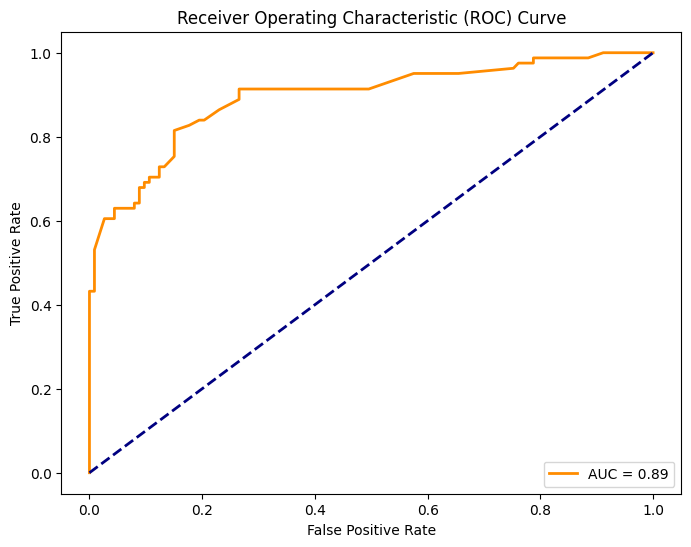

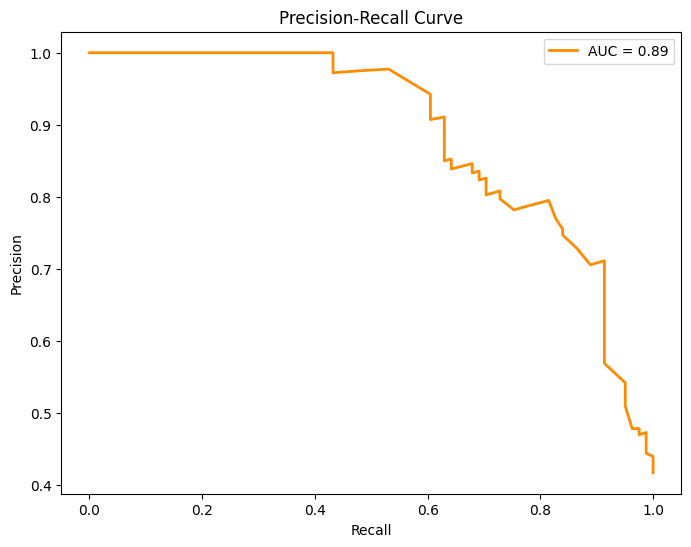

In [341]:
# Make predictions
y_pred = catboost_pipeline.predict(X_test)
y_proba = catboost_pipeline.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC Curve and AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print Confusion Matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print Classification Report
print('\nClassification Report:')
print(class_report)

# Print AUC-ROC and AUC-PR
print(f'\nAUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {pr_auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Overall good model
Decision tree is better because in this situation we don't focus precision or recall in some side - zero or one. That's why we get overally better score in Decision Tree. Decision Tree's precision and Recall score for 0 and 1 are near, and high enough


In [347]:
# Save the fitted pipeline to a file
joblib.dump(dec_tree_pipeline, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [349]:
# Load the saved model
loaded_model = joblib.load('decision_tree_model.joblib')

# Make predictions using the loaded model
new_data_predictions = loaded_model.predict(df_final_test)

In [350]:
new_data_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [360]:
# Example Submission file
submitted = pd.read_csv('gender_submission.csv')
submitted.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [361]:
submitted['MyPredictions'] = new_data_predictions

In [362]:
submitted.head()

,PassengerId,Survived,MyPredictions
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1


In [363]:
new_submission = submitted[['PassengerId', 'MyPredictions']]

In [365]:
new_submission.columns

Index(['PassengerId', 'MyPredictions'], dtype='object')

In [366]:
new_submission.columns = ['PassengerId', 'Survived']

In [367]:
new_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [368]:
# save last file
new_submission.to_csv('new_submission.csv')

# Thanks :)